## 3.2 CartPoleを試す

In [2]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym

In [3]:
# 動画の描画関数の宣言
# 参考URL http://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display


def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),
               dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                   interval=50)

    anim.save('movie_cartpole.mp4')  # 追記：動画の保存です
    display(display_animation(anim, default_mode='loop'))


In [6]:
# CartPoleをランダムに動かす

frames = []
env = gym.make('CartPole-v0')
observation = env.reset()  # 最初に環境のresetが必要

for step in range(0, 200):
    frames.append(env.render(mode='rgb_array'))  # framesに各時刻の画像を追加していく
    action = np.random.choice(2)  # 0(カートを左に押す), 1(カートを右に押す)をランダムに返す
    observation, reward, done, info = env.step(action)  # actionを実行する

# 注意：実行後にipykernel_launcher.p...というindowが開いて固まりますが放置しておいてください

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


<script language="javascript">
  /* Define the Animation class */
  function Animation(frames, img_id, slider_id, interval, loop_select_id){
    this.img_id = img_id;
    this.slider_id = slider_id;
    this.loop_select_id = loop_select_id;
    this.interval = interval;
    this.current_frame = 0;
    this.direction = 0;
    this.timer = null;
    this.frames = new Array(frames.length);

    for (var i=0; i<frames.length; i++)
    {
     this.frames[i] = new Image();
     this.frames[i].src = frames[i];
    }
    document.getElementById(this.slider_id).max = this.frames.length - 1;
    this.set_frame(this.current_frame);
  }

  Animation.prototype.get_loop_state = function(){
    var button_group = document[this.loop_select_id].state;
    for (var i = 0; i < button_group.length; i++) {
        var button = button_group[i];
        if (button.checked) {
            return button.value;
        }
    }
    return undefined;
  }

  Animation.prototype.set_frame = function(frame){
    this.current_frame = frame;
    document.getElementById(this.img_id).src = this.frames[this.current_frame].src;
    document.getElementById(this.slider_id).value = this.current_frame;
  }

  Animation.prototype.next_frame = function()
  {
    this.set_frame(Math.min(this.frames.length - 1, this.current_frame + 1));
  }

  Animation.prototype.previous_frame = function()
  {
    this.set_frame(Math.max(0, this.current_frame - 1));
  }

  Animation.prototype.first_frame = function()
  {
    this.set_frame(0);
  }

  Animation.prototype.last_frame = function()
  {
    this.set_frame(this.frames.length - 1);
  }

  Animation.prototype.slower = function()
  {
    this.interval /= 0.7;
    if(this.direction > 0){this.play_animation();}
    else if(this.direction < 0){this.reverse_animation();}
  }

  Animation.prototype.faster = function()
  {
    this.interval *= 0.7;
    if(this.direction > 0){this.play_animation();}
    else if(this.direction < 0){this.reverse_animation();}
  }

  Animation.prototype.anim_step_forward = function()
  {
    this.current_frame += 1;
    if(this.current_frame < this.frames.length){
      this.set_frame(this.current_frame);
    }else{
      var loop_state = this.get_loop_state();
      if(loop_state == "loop"){
        this.first_frame();
      }else if(loop_state == "reflect"){
        this.last_frame();
        this.reverse_animation();
      }else{
        this.pause_animation();
        this.last_frame();
      }
    }
  }

  Animation.prototype.anim_step_reverse = function()
  {
    this.current_frame -= 1;
    if(this.current_frame >= 0){
      this.set_frame(this.current_frame);
    }else{
      var loop_state = this.get_loop_state();
      if(loop_state == "loop"){
        this.last_frame();
      }else if(loop_state == "reflect"){
        this.first_frame();
        this.play_animation();
      }else{
        this.pause_animation();
        this.first_frame();
      }
    }
  }

  Animation.prototype.pause_animation = function()
  {
    this.direction = 0;
    if (this.timer){
      clearInterval(this.timer);
      this.timer = null;
    }
  }

  Animation.prototype.play_animation = function()
  {
    this.pause_animation();
    this.direction = 1;
    var t = this;
    if (!this.timer) this.timer = setInterval(function(){t.anim_step_forward();}, this.interval);
  }

  Animation.prototype.reverse_animation = function()
  {
    this.pause_animation();
    this.direction = -1;
    var t = this;
    if (!this.timer) this.timer = setInterval(function(){t.anim_step_reverse();}, this.interval);
  }
</script>

<div class="animation" align="center">
    <img id="_anim_imgXSAHITCWXMIMTOUC">
    <br>
    <input id="_anim_sliderXSAHITCWXMIMTOUC" type="range" style="width:350px" name="points" min="0" max="1" step="1" value="0" onchange="animXSAHITCWXMIMTOUC.set_frame(parseInt(this.value));"></input>
    <br>
    <button onclick="animXSAHITCWXMIMTOUC.slower()">&#8211;</button>
    <button onclick="animXSAHITCWXMIMTOUC.first_frame
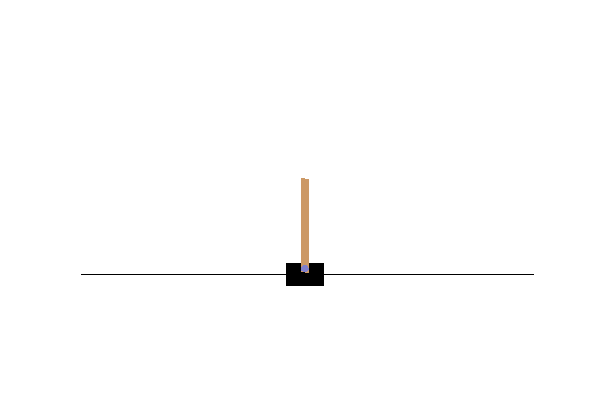
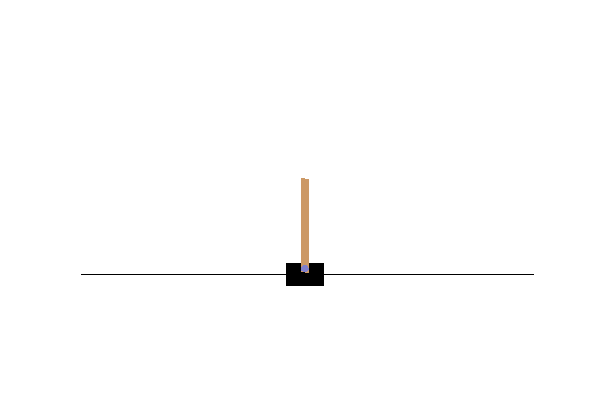
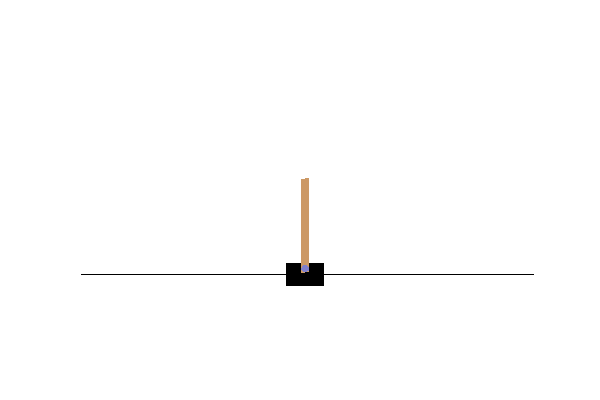
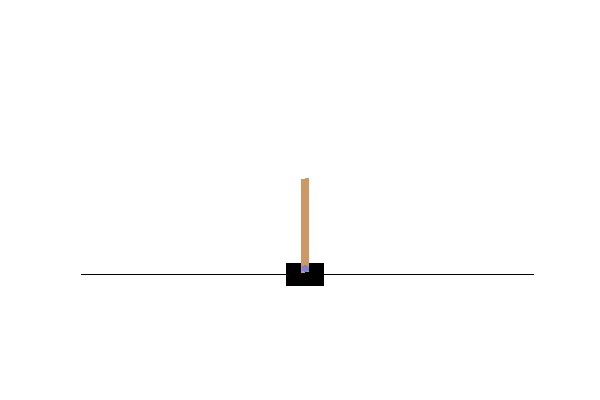
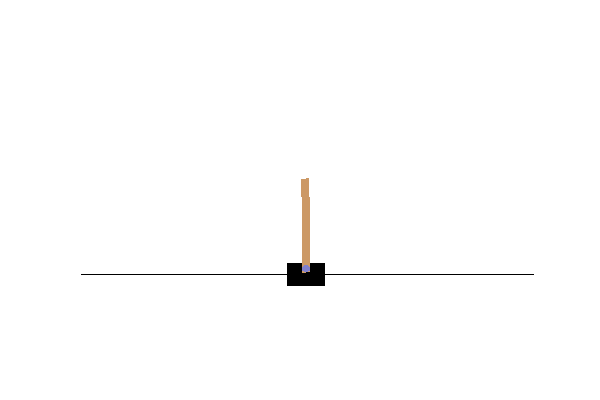
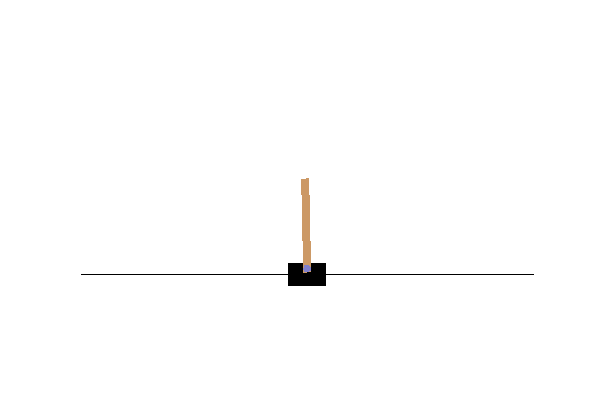
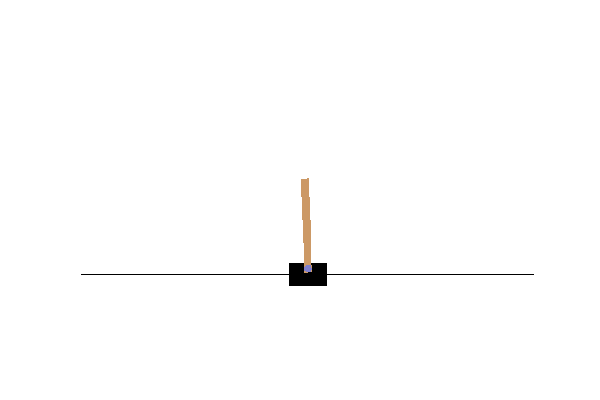
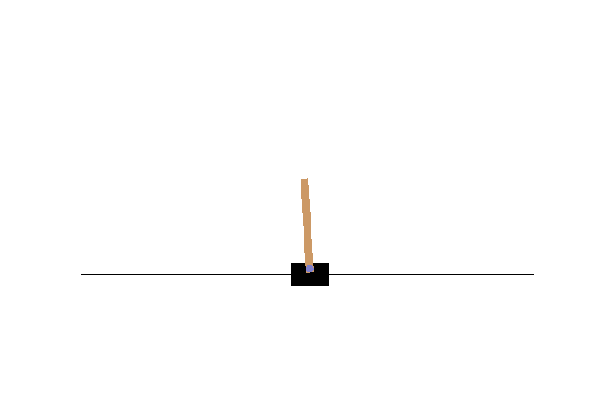
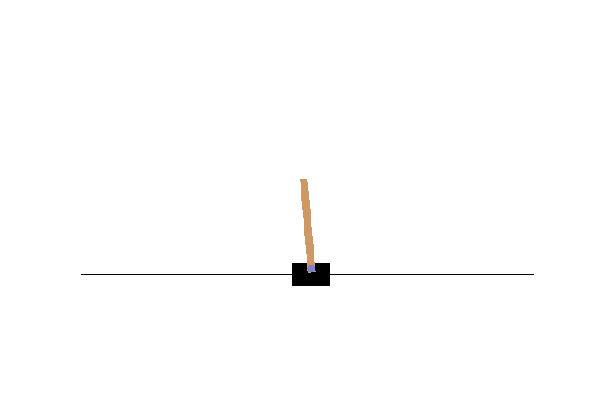
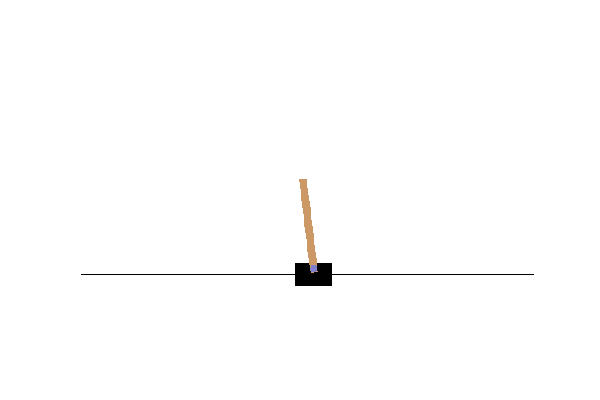
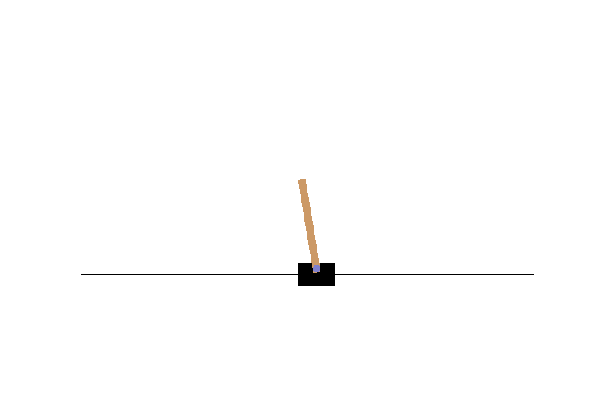
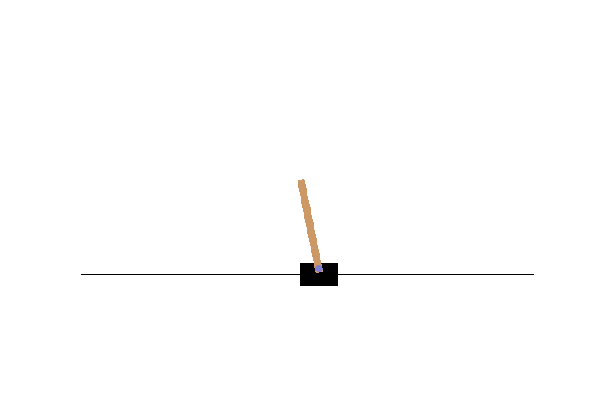
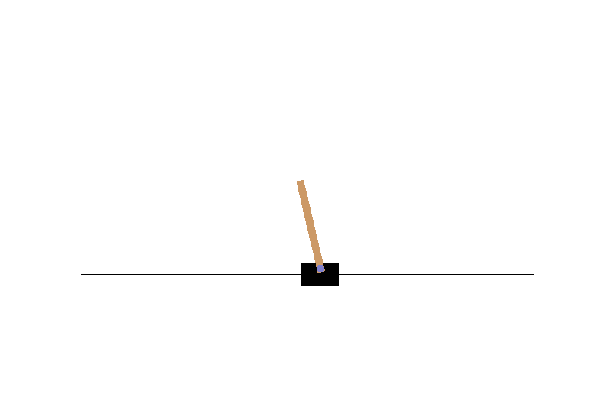
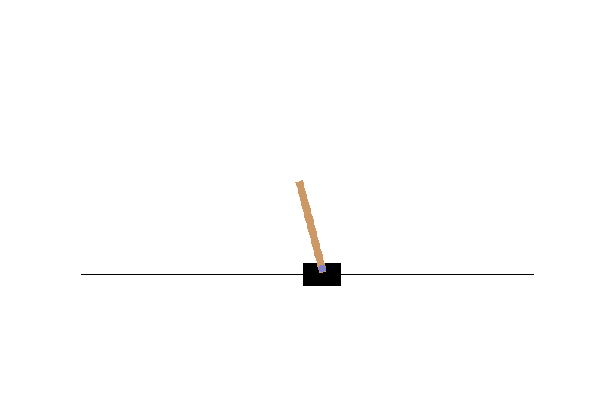
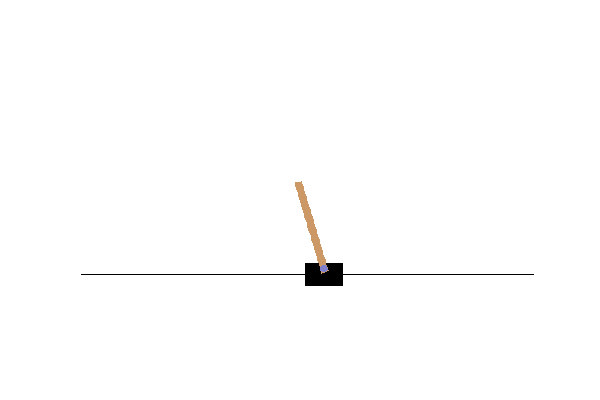
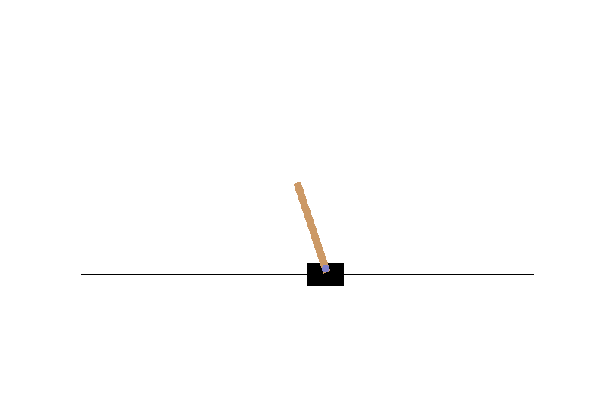
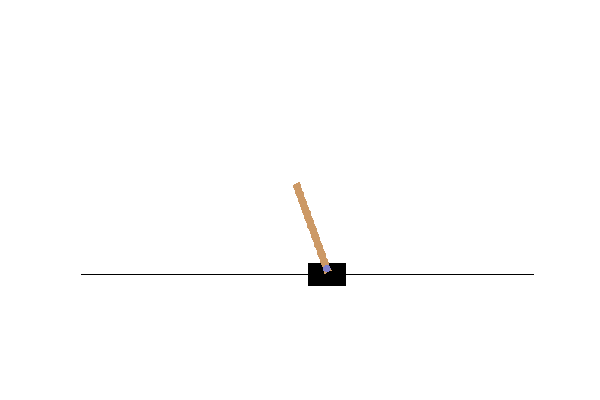
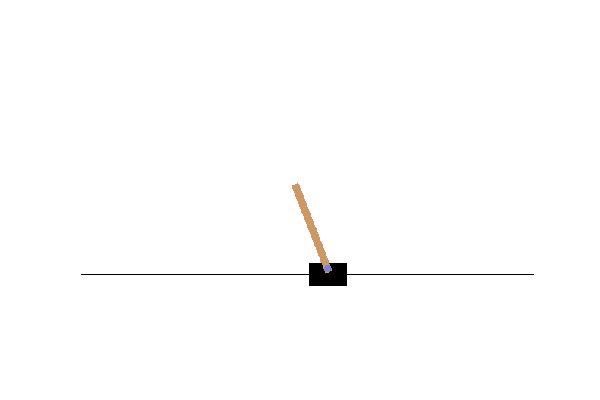
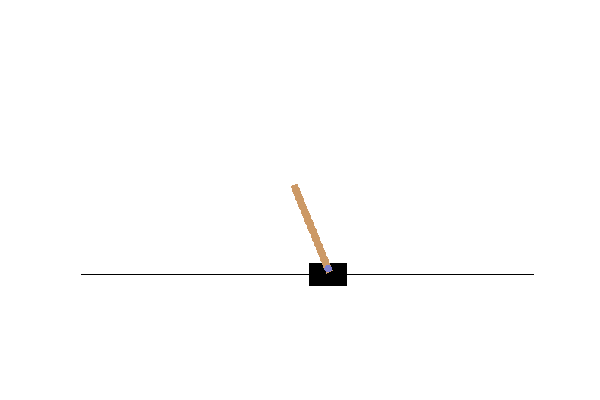
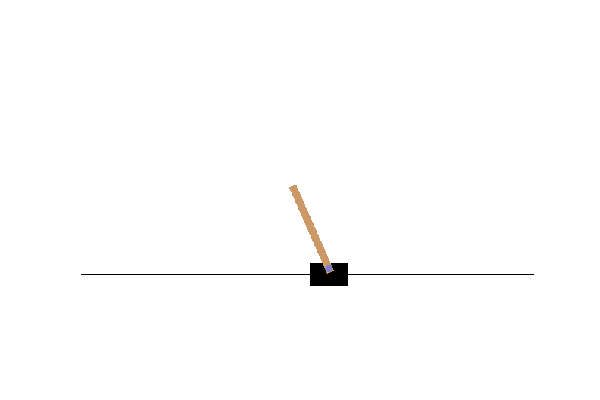
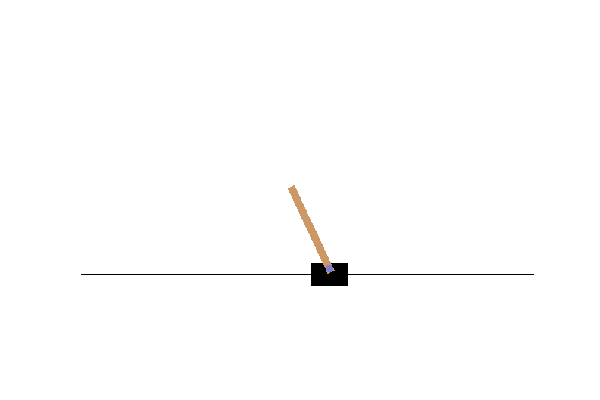
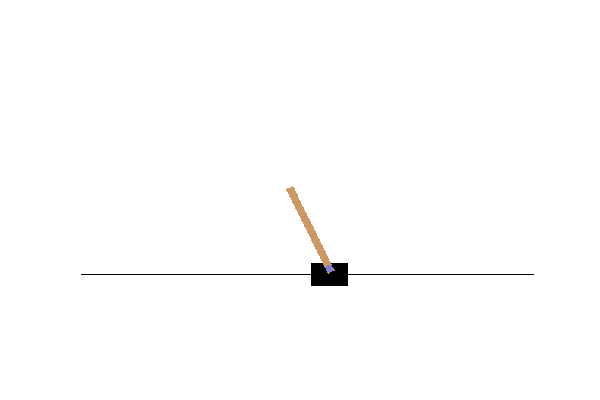
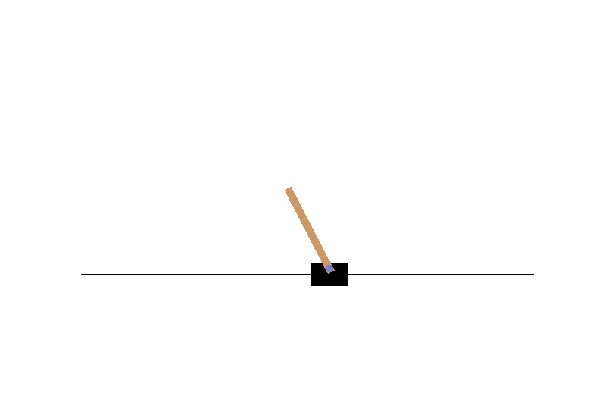
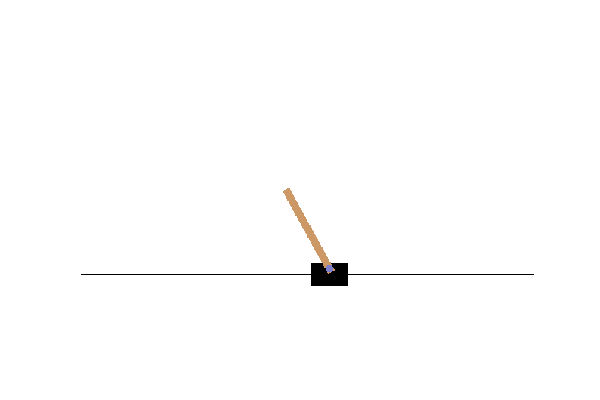
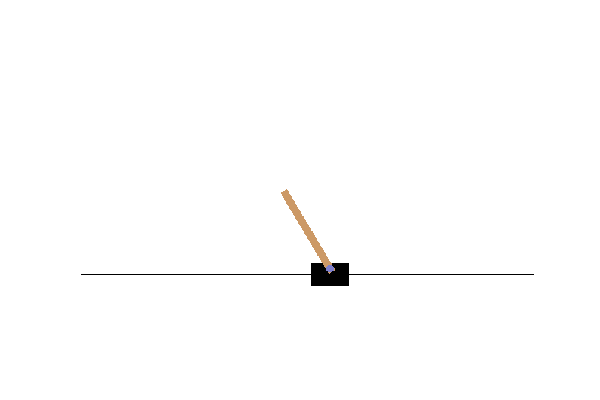
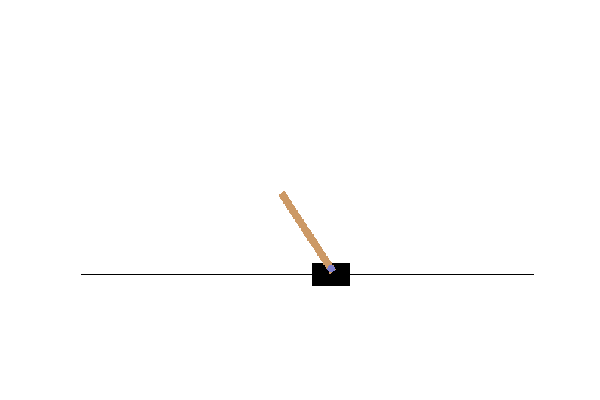
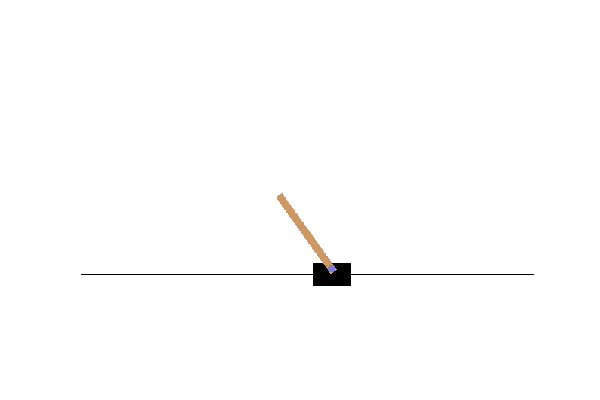
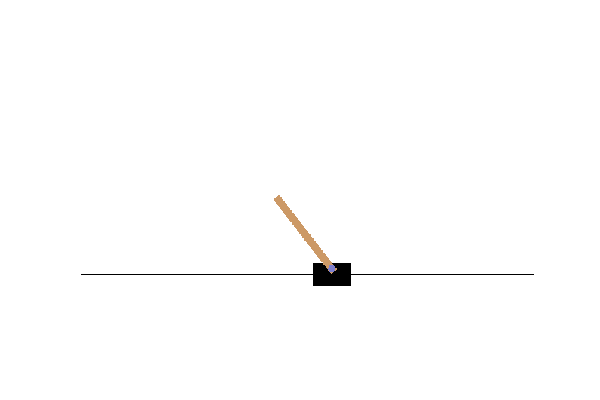
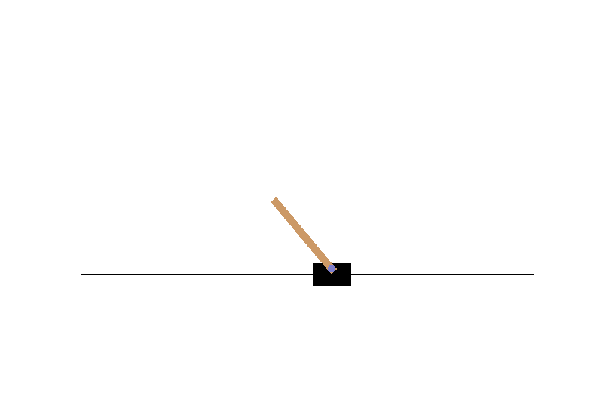
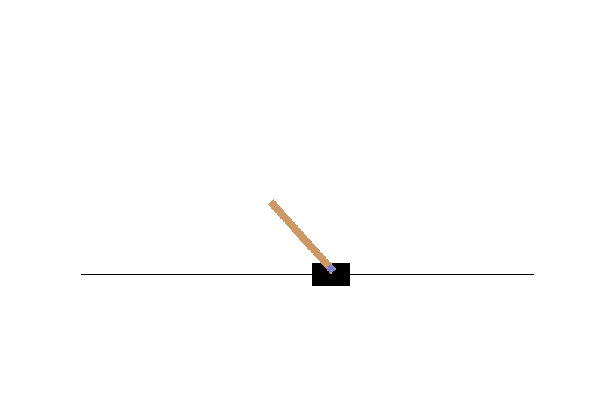
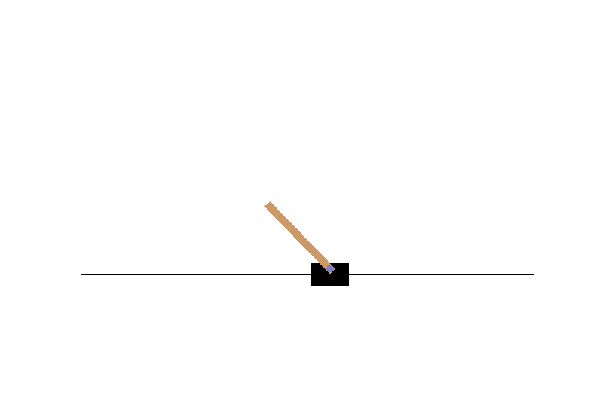
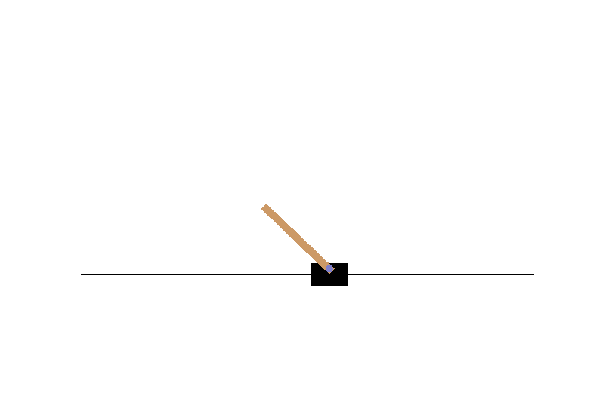
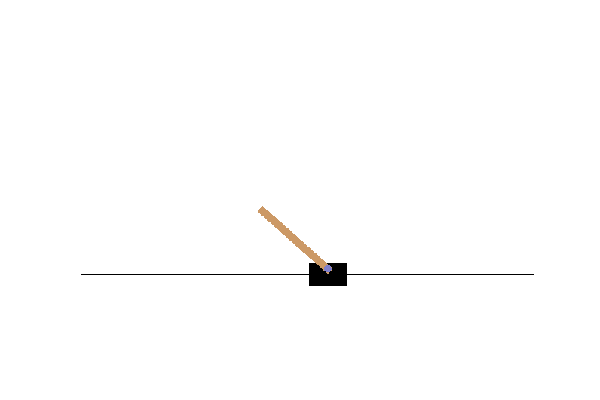
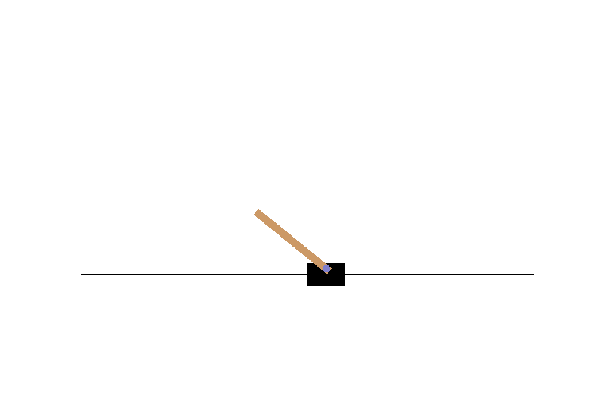
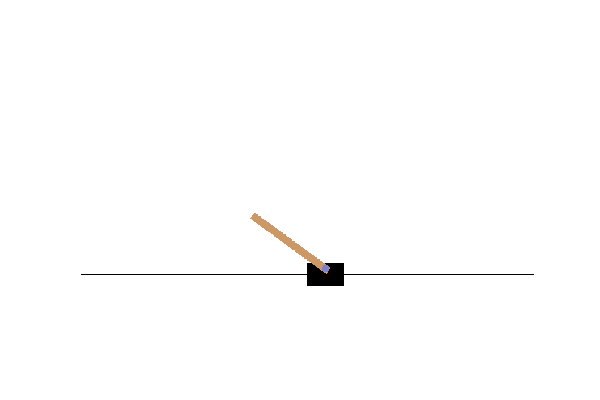
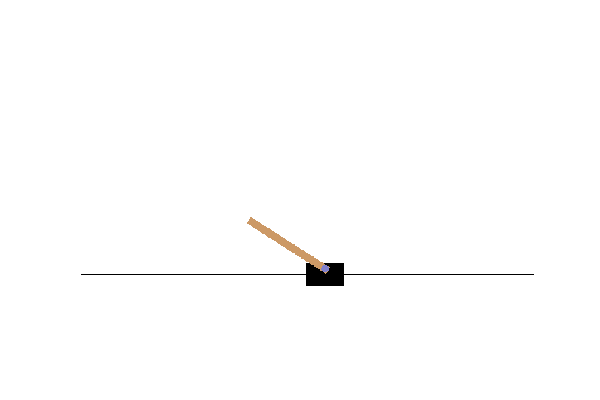
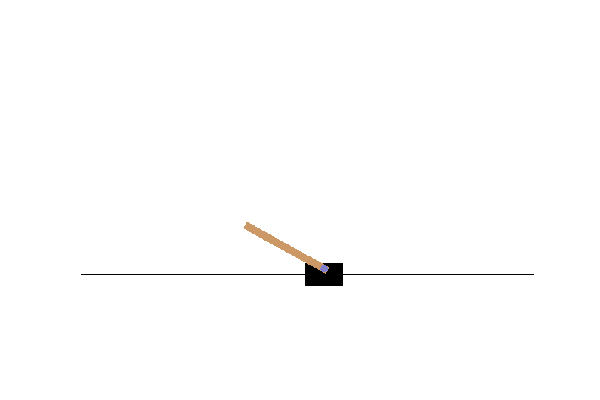
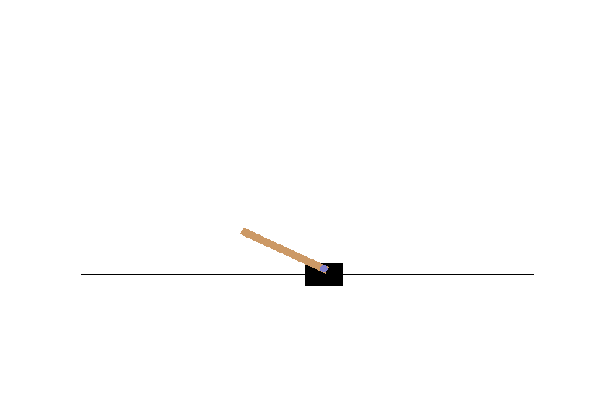
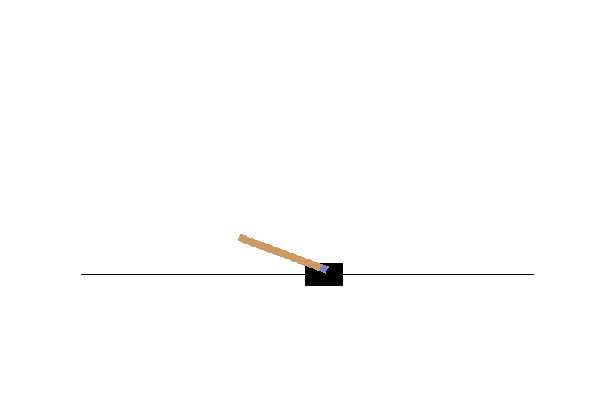
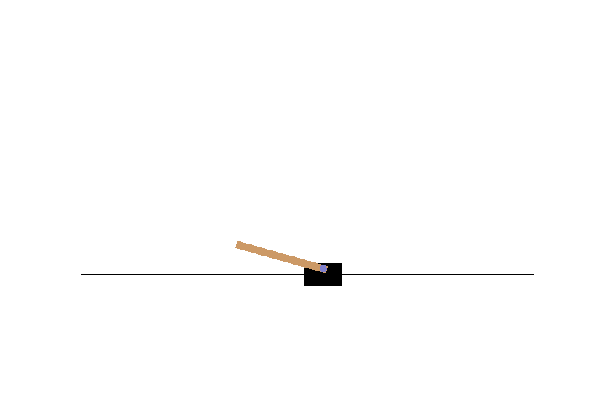
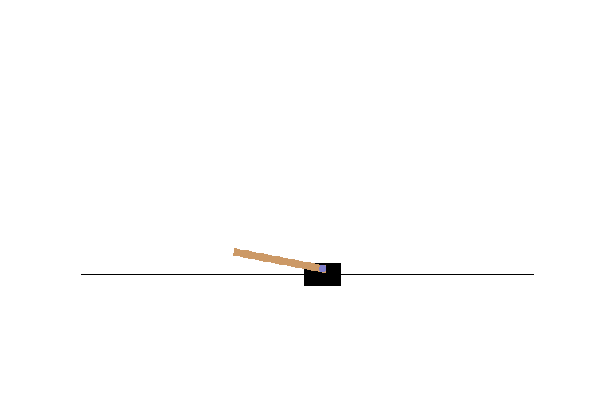
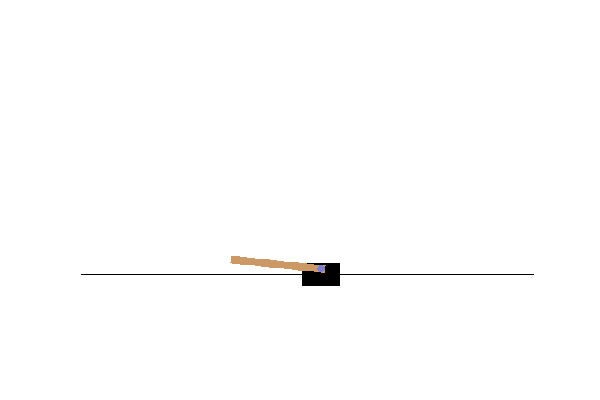
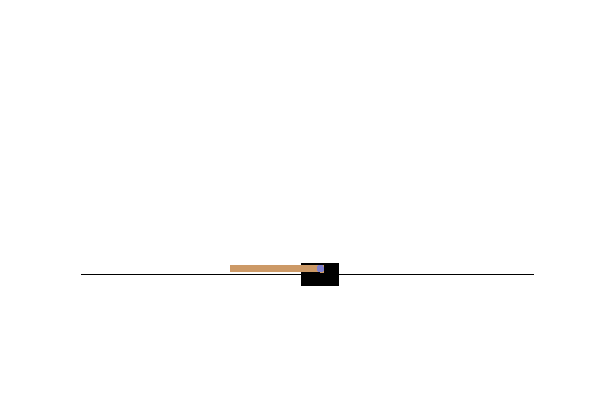
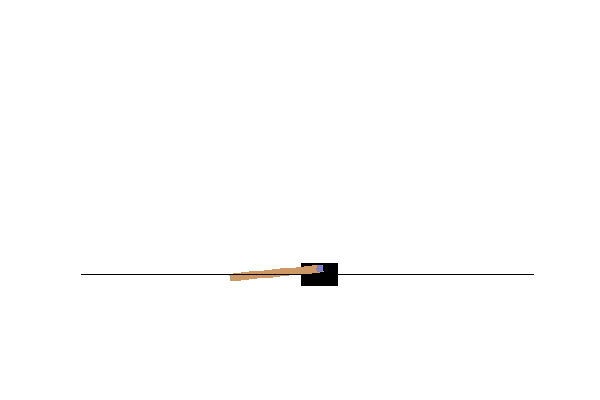
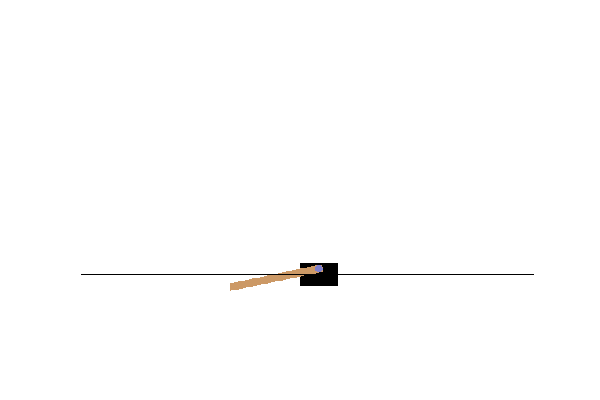
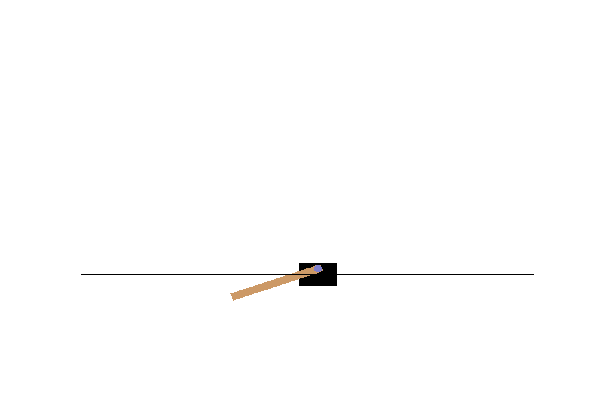
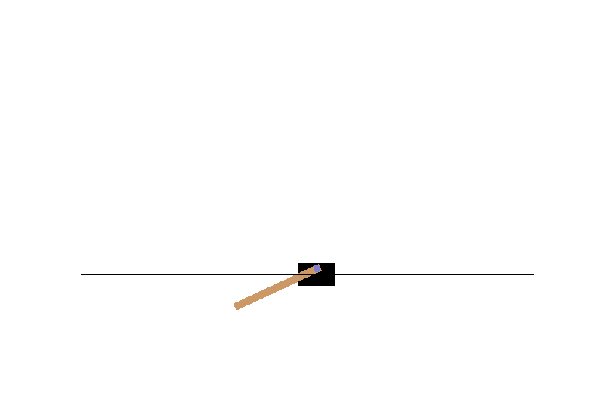
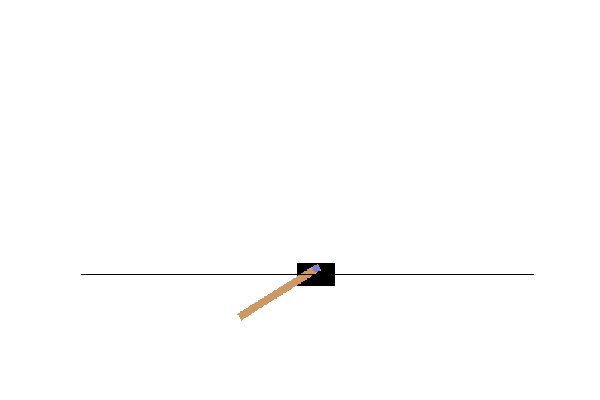
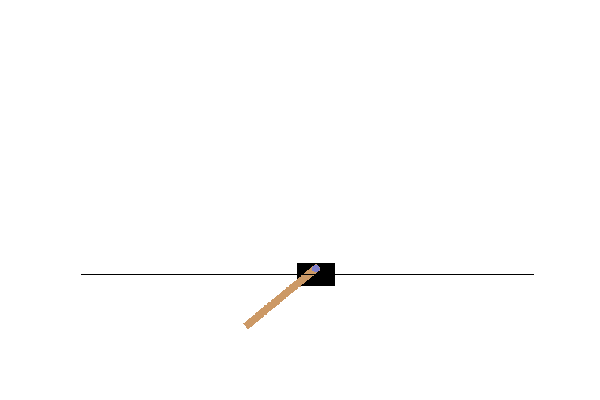
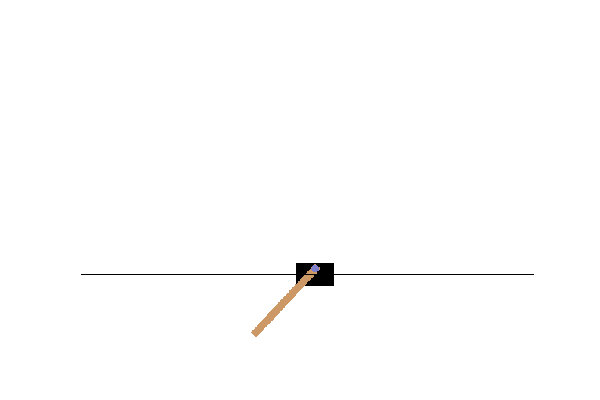
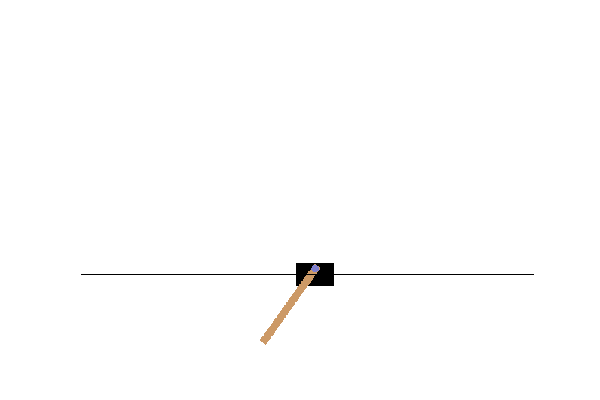
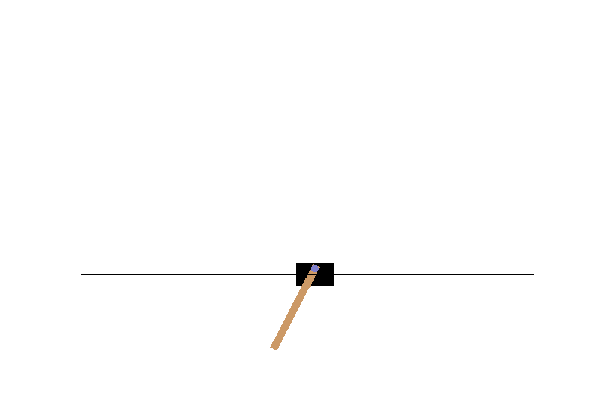
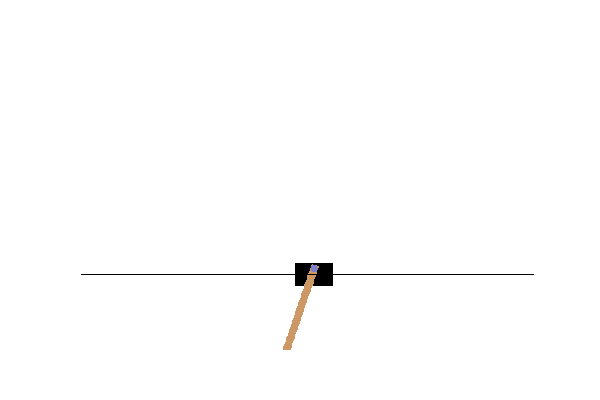
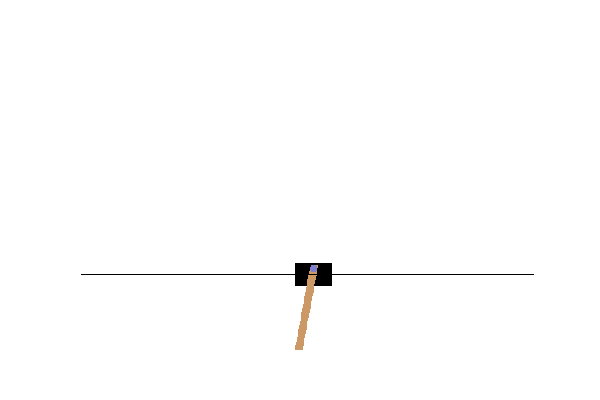
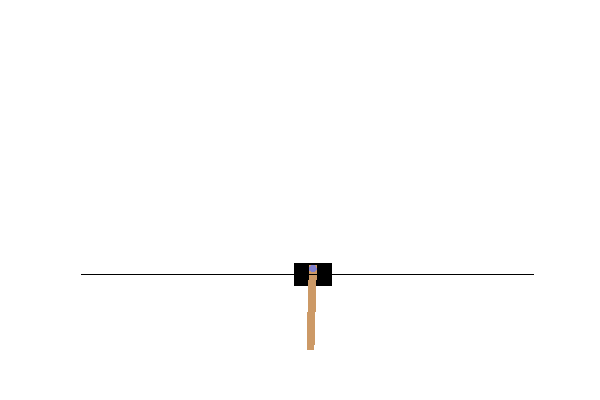
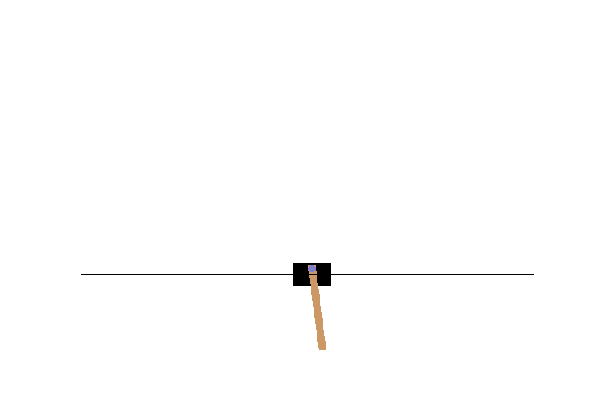
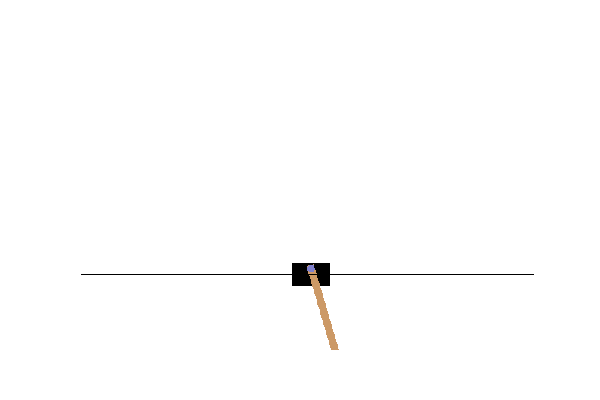
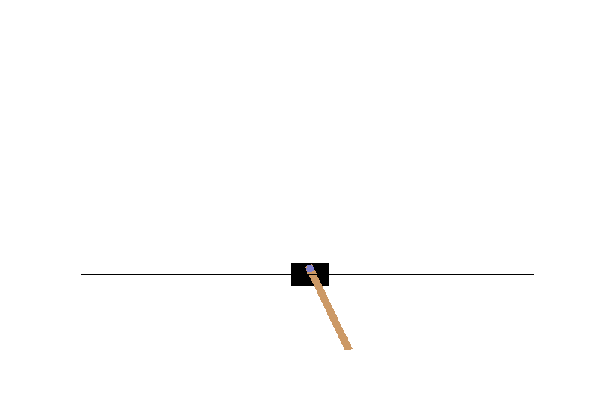
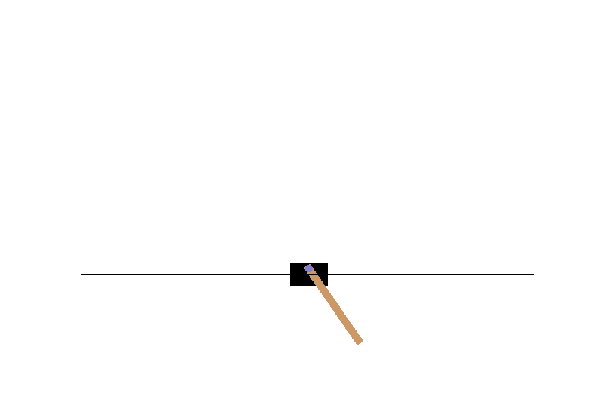
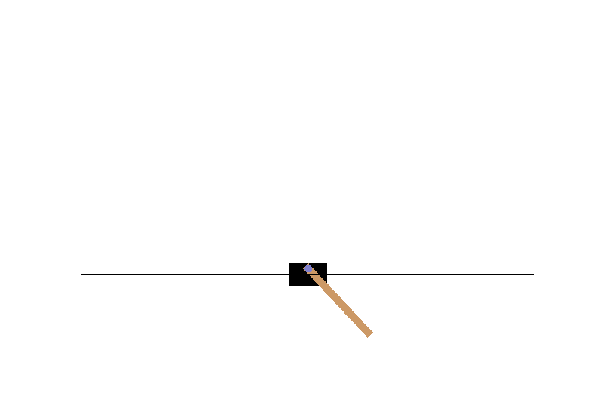
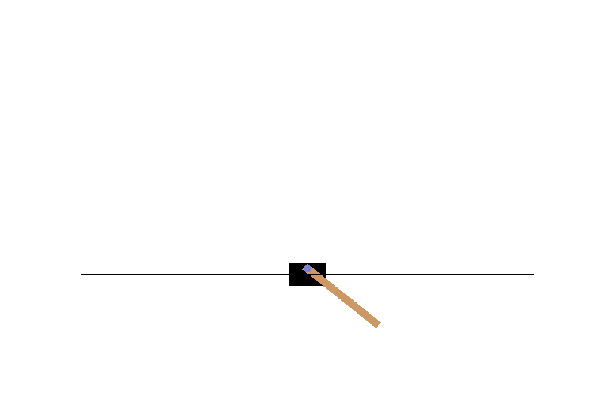
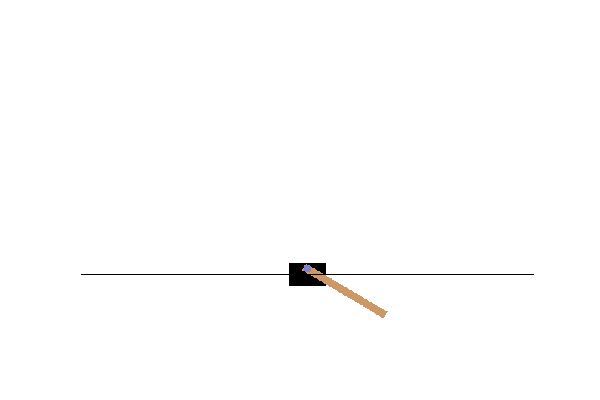
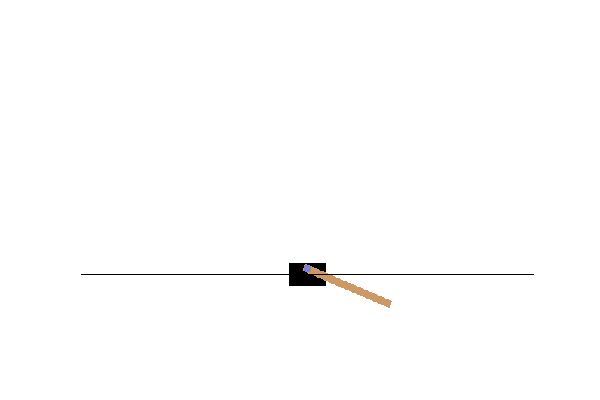
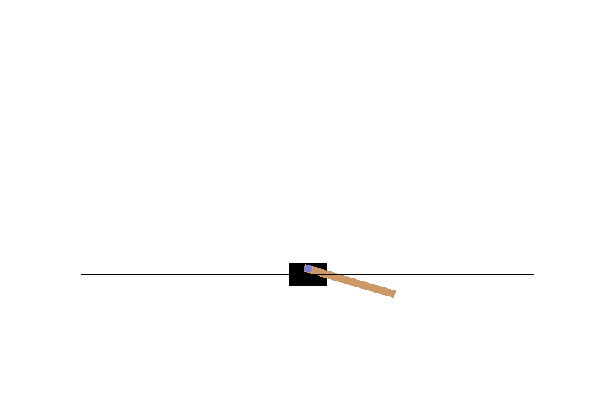
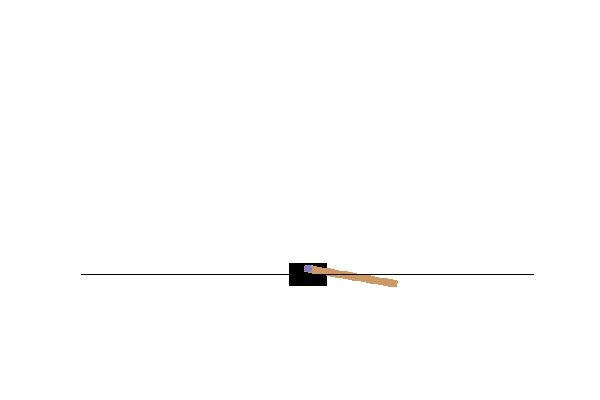
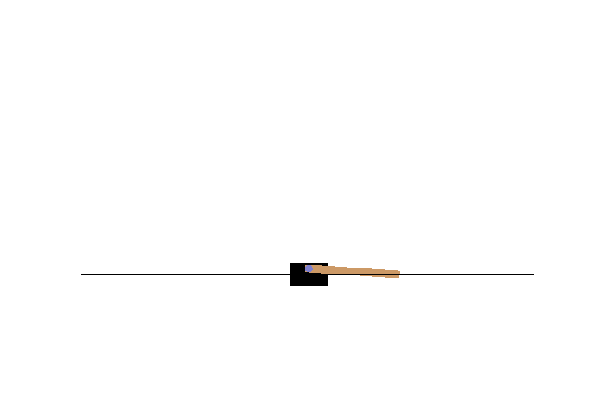
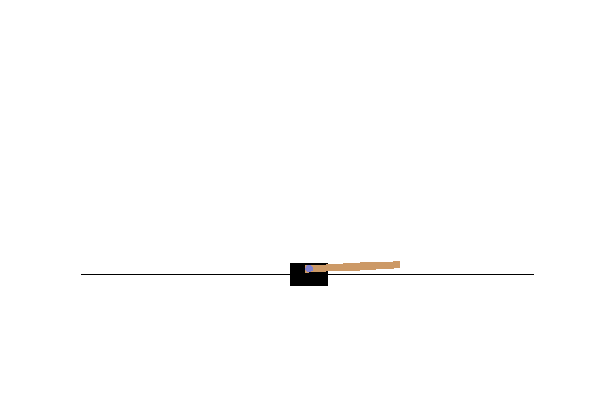
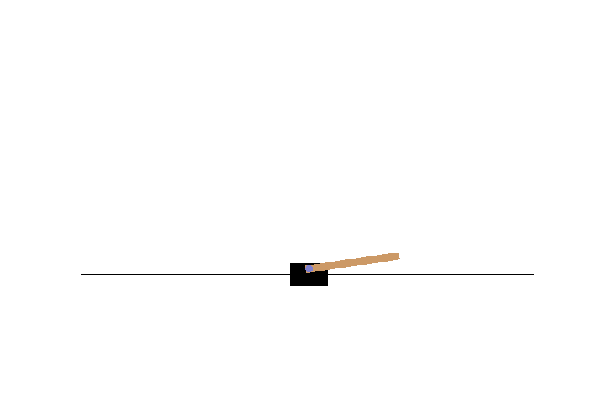
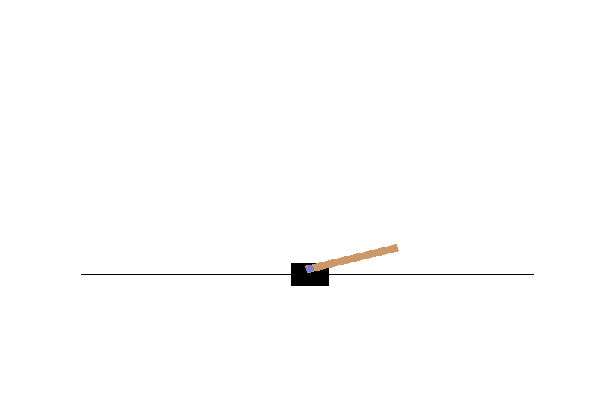
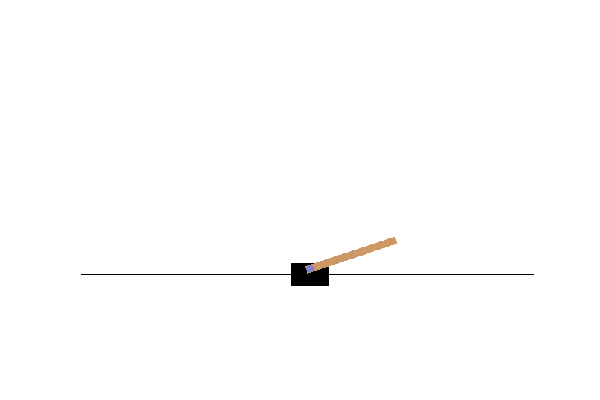
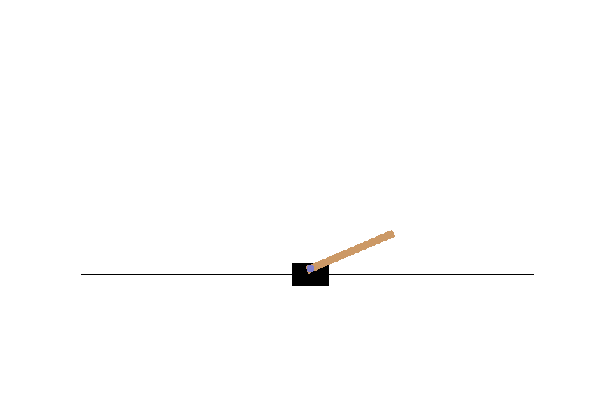
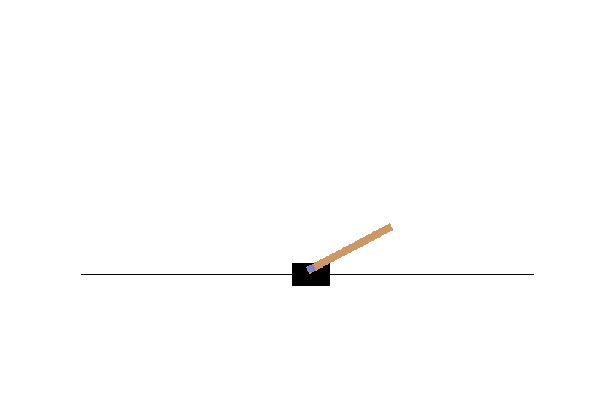
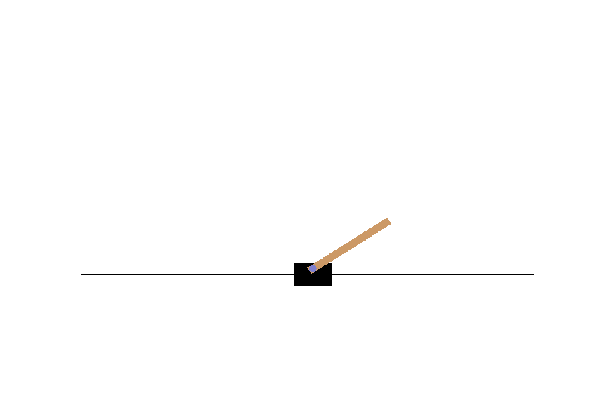
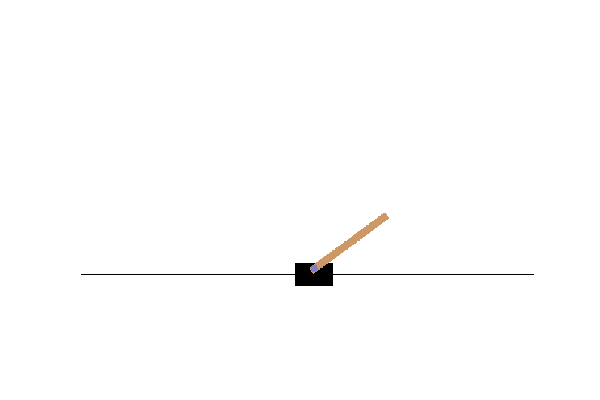
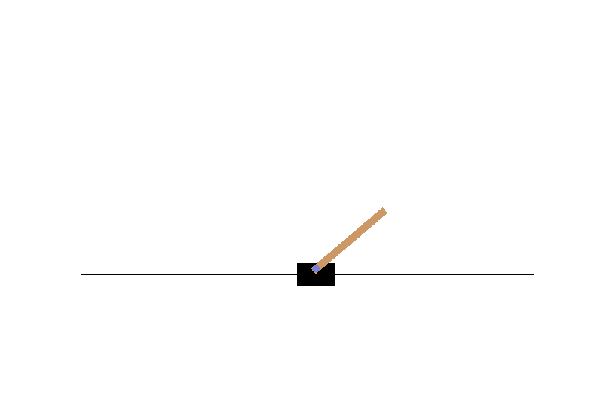
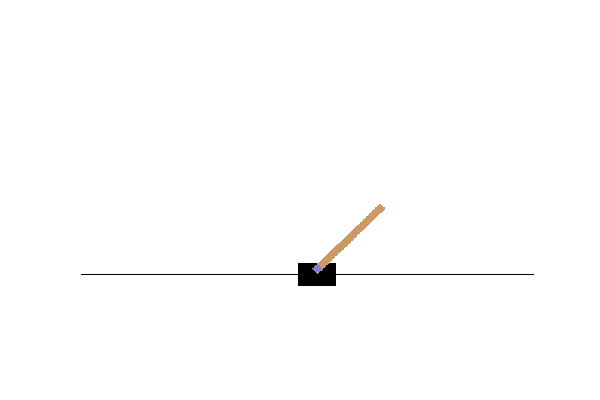
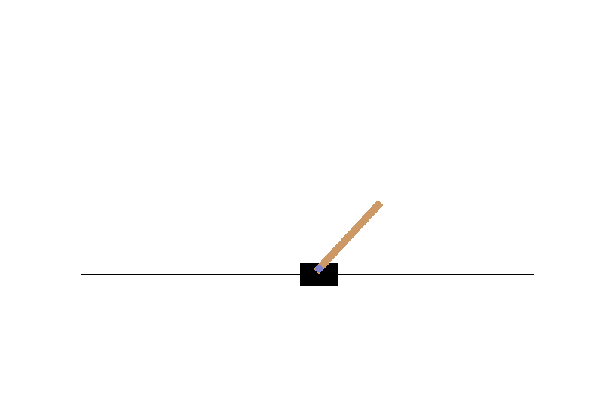
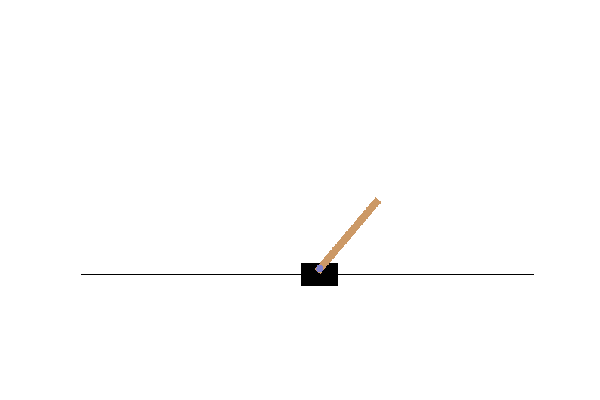
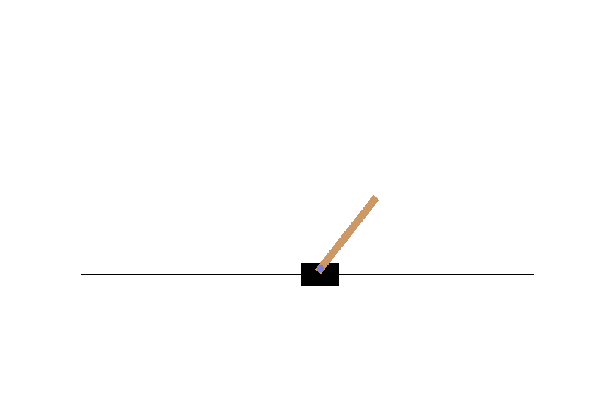
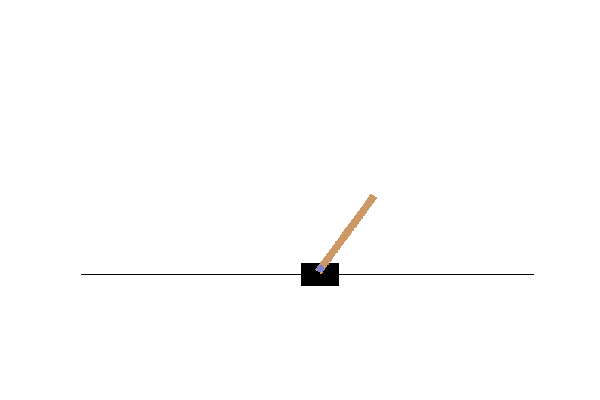
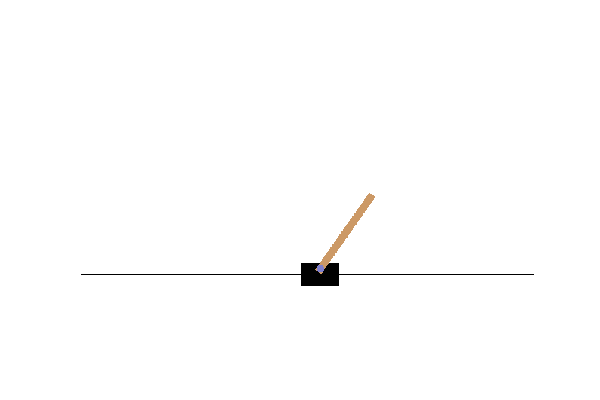
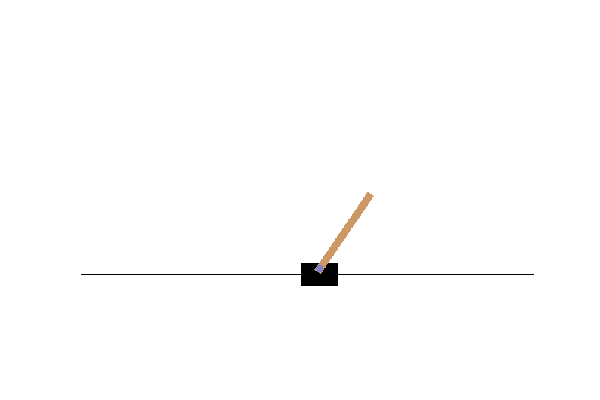
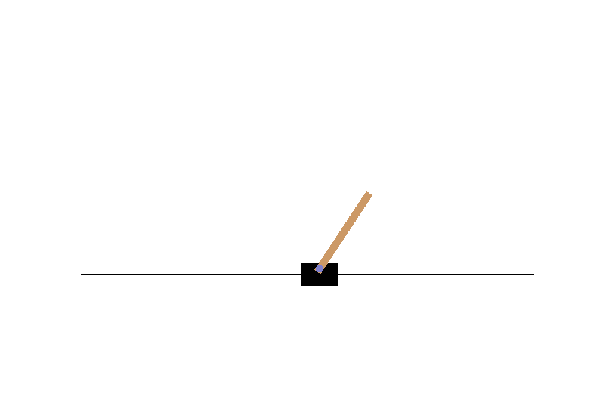
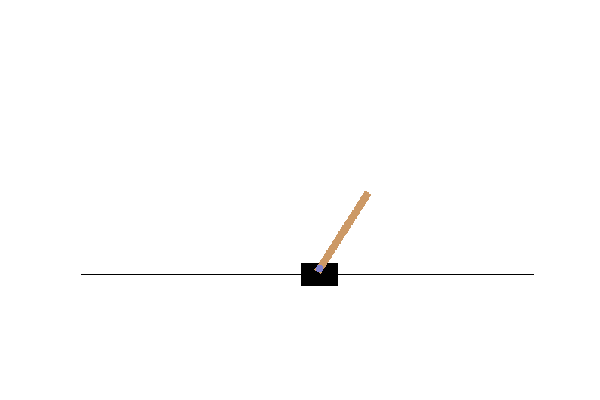
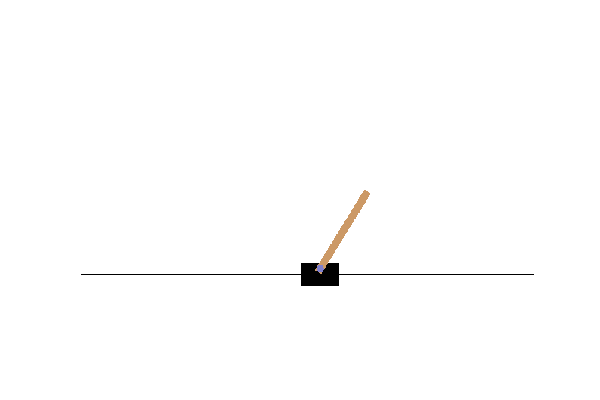
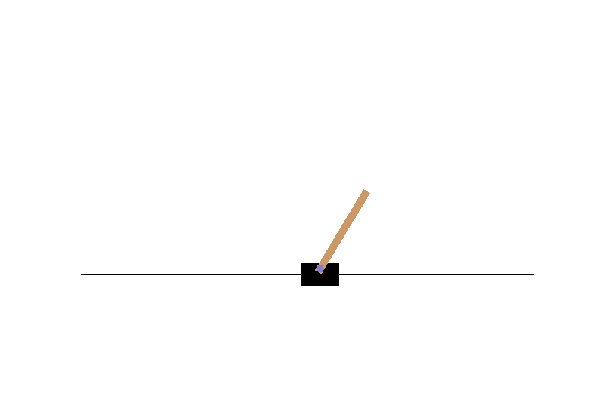
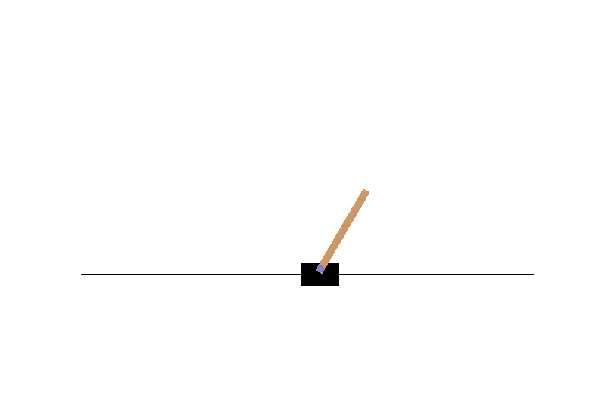
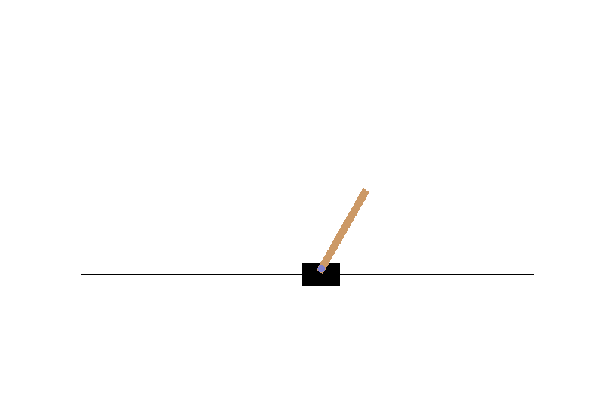
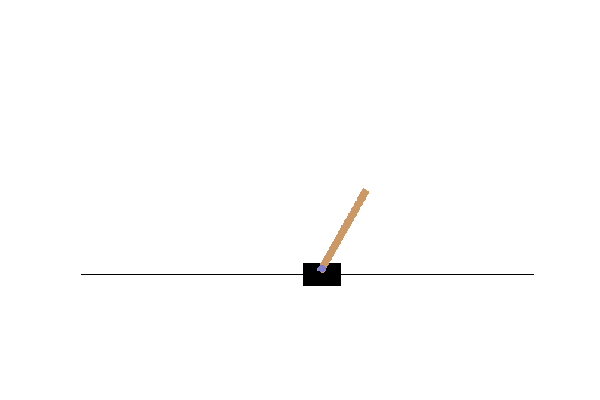
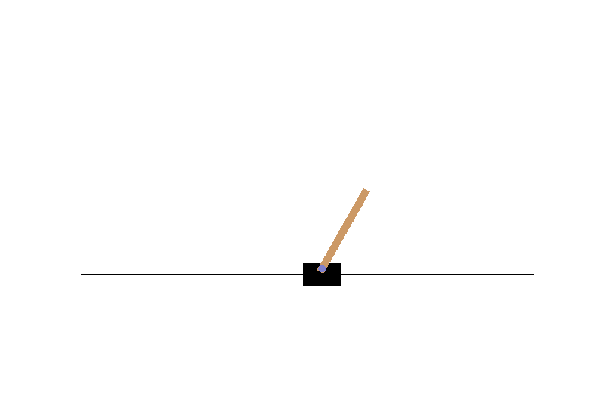
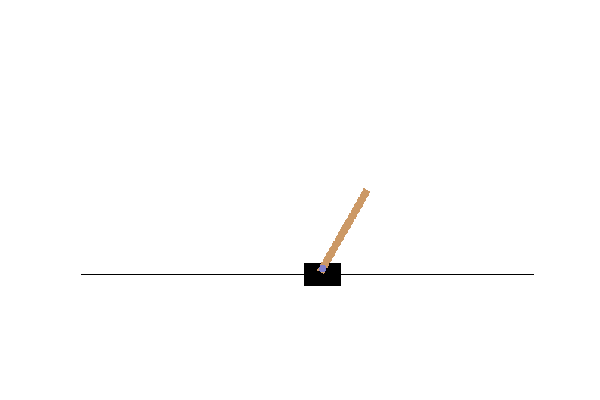
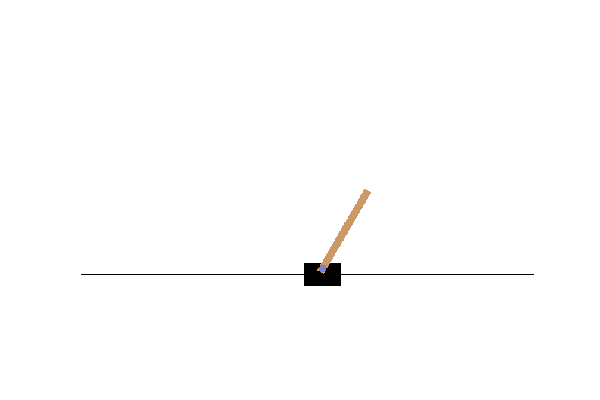
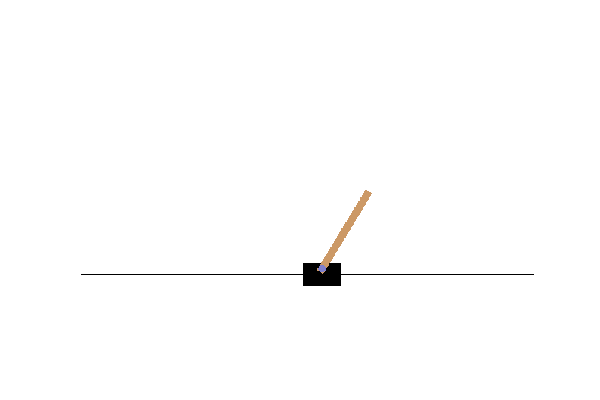
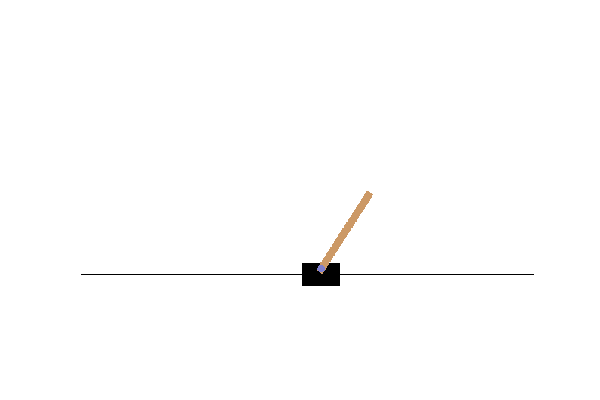
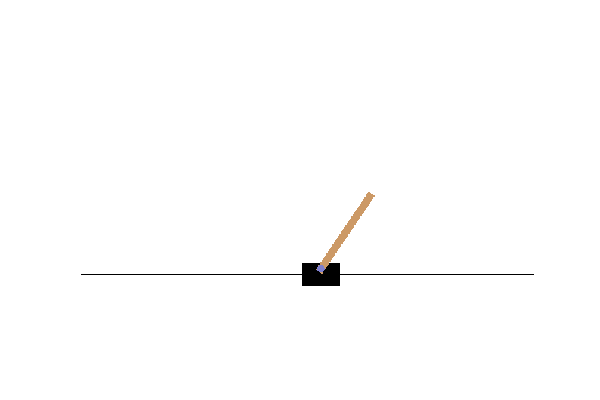
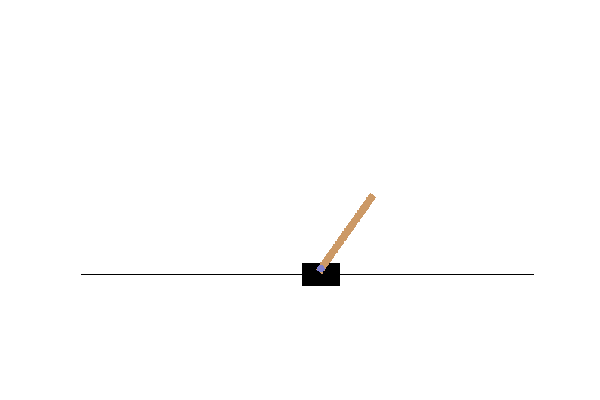
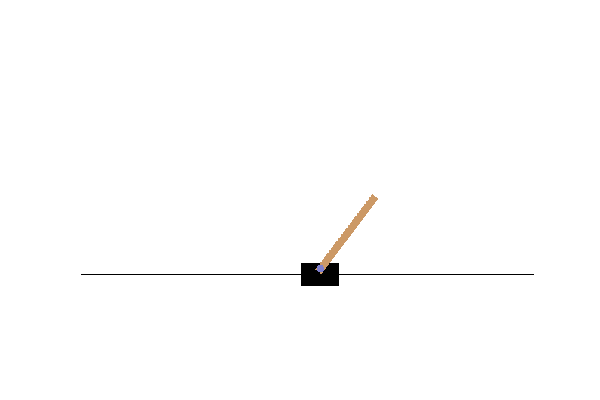
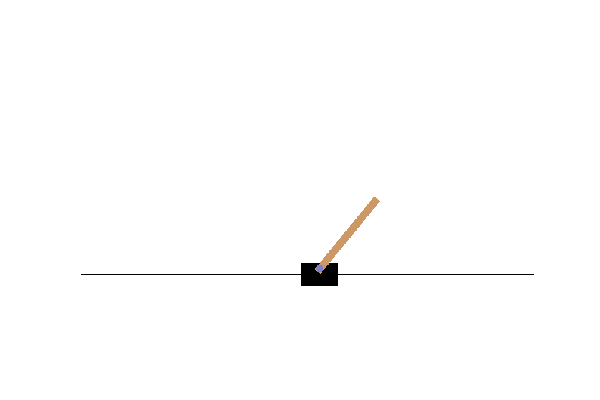
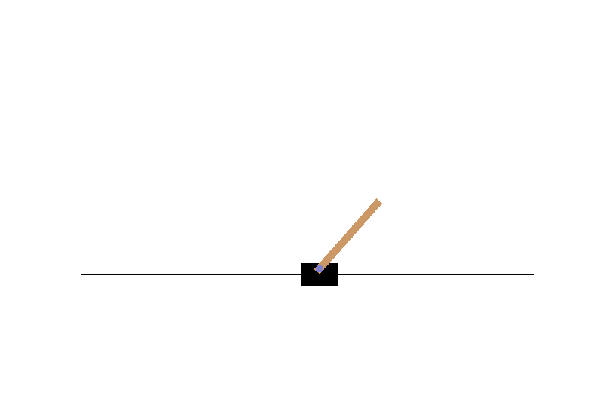
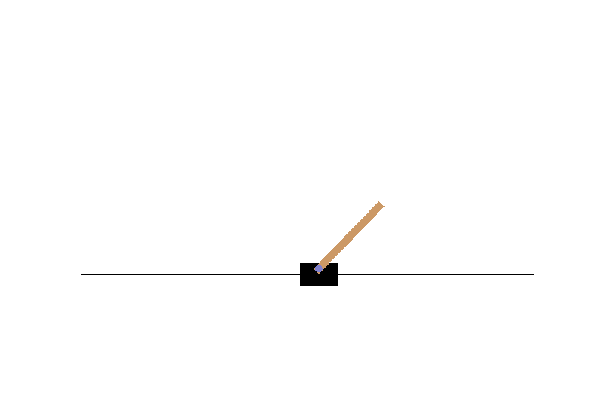
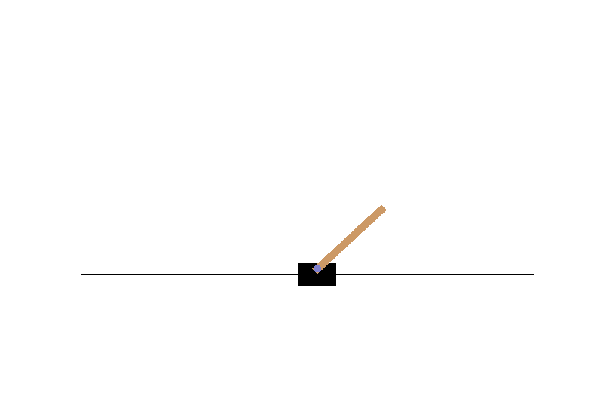
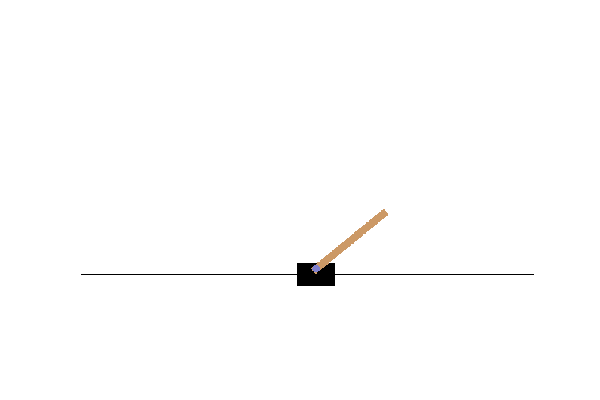
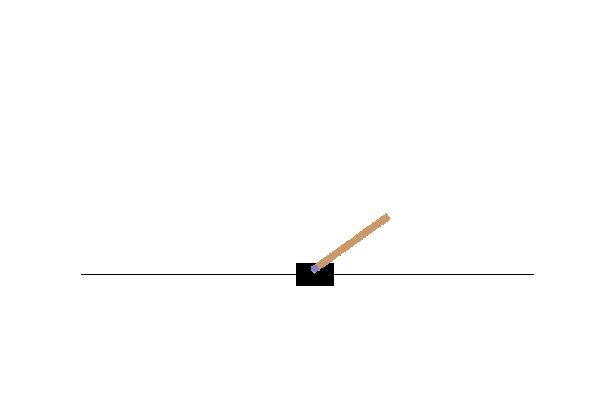
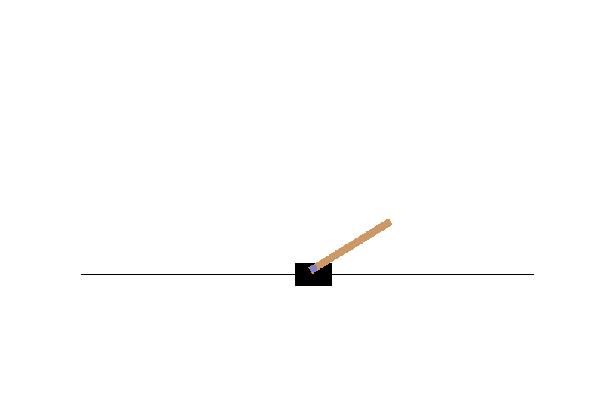
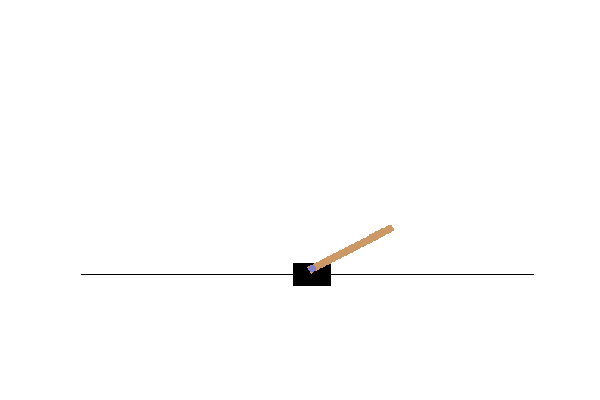
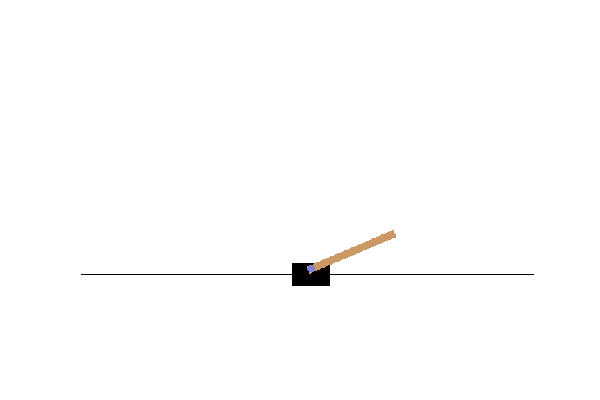
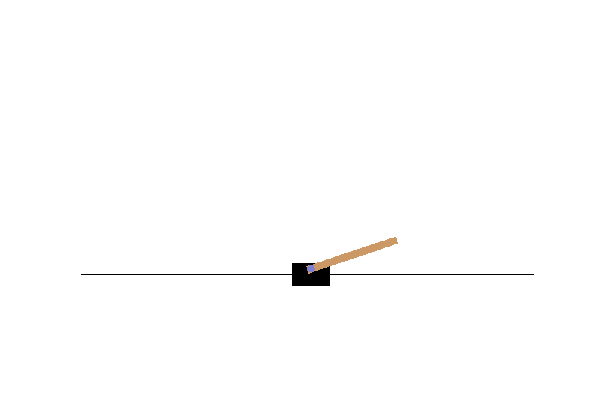
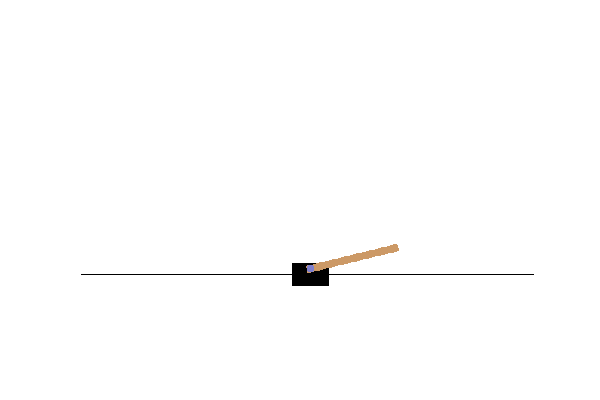
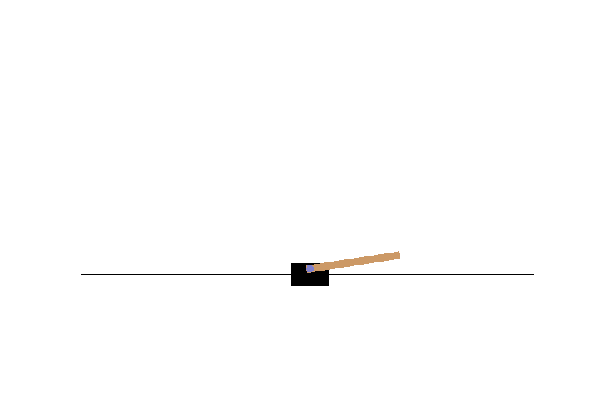
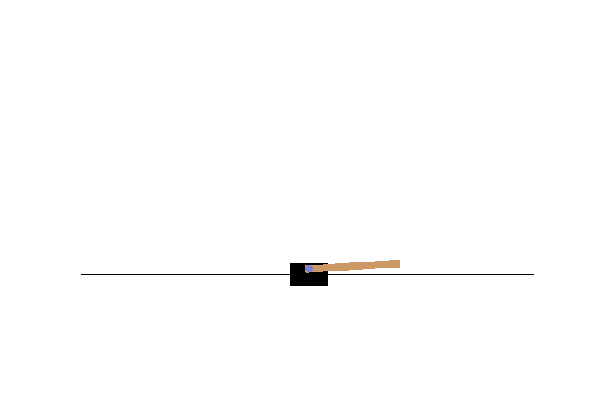
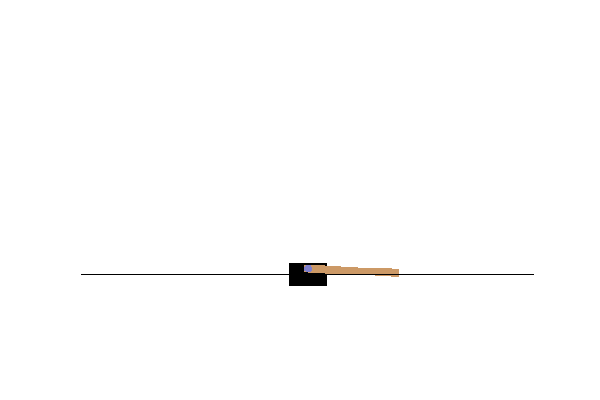
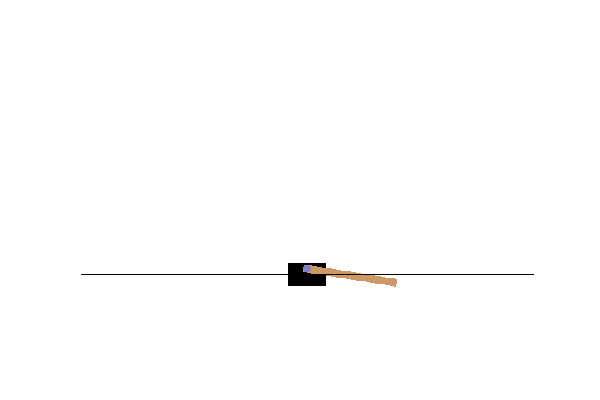
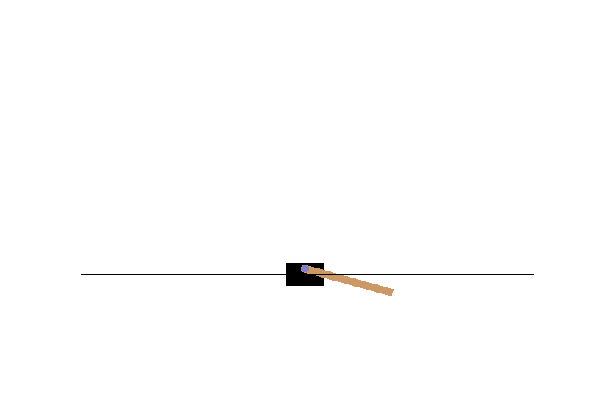
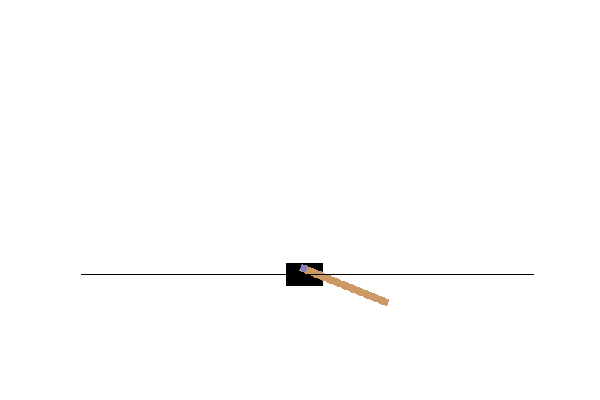
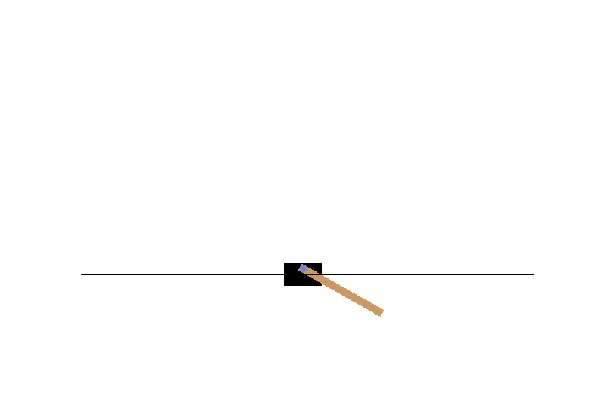
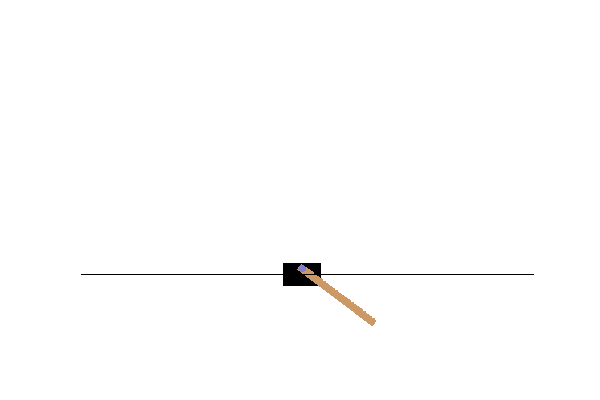
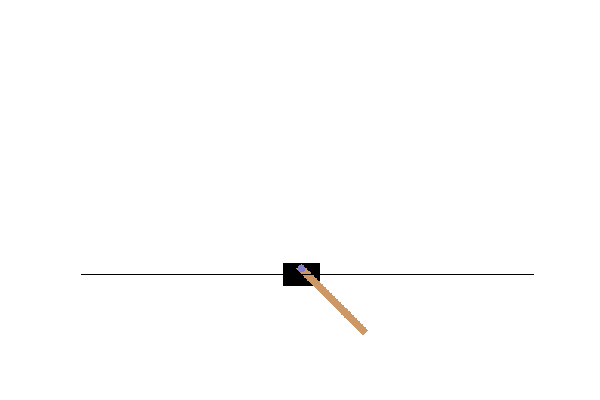
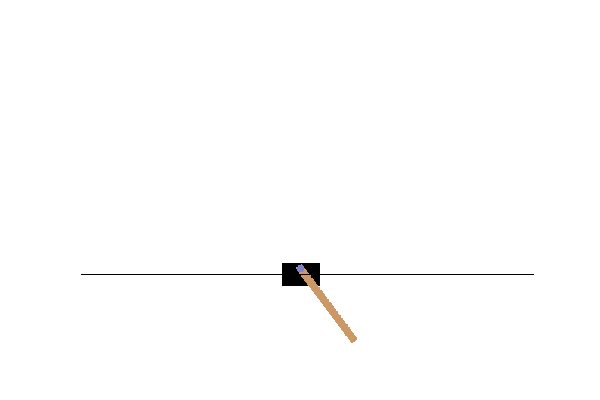
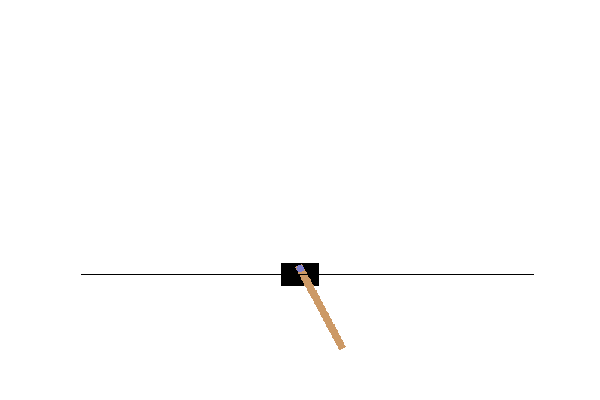
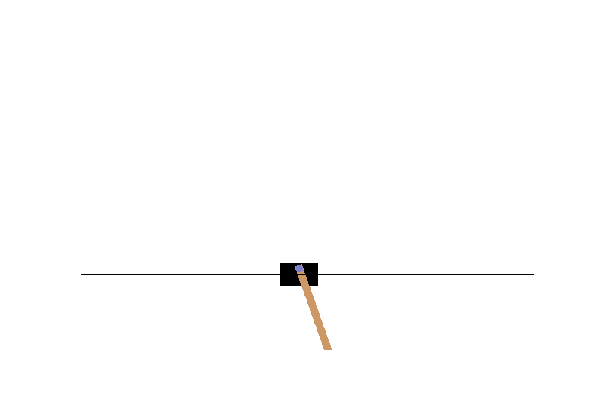
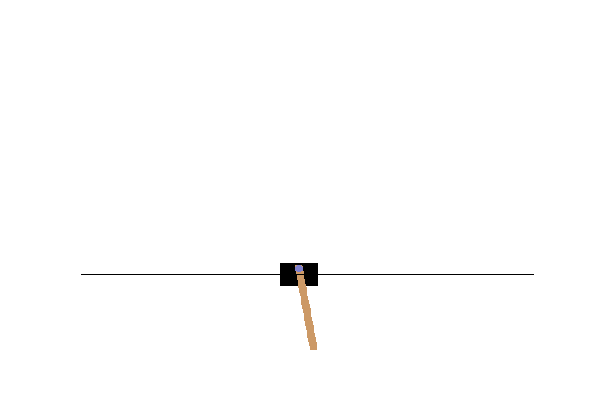
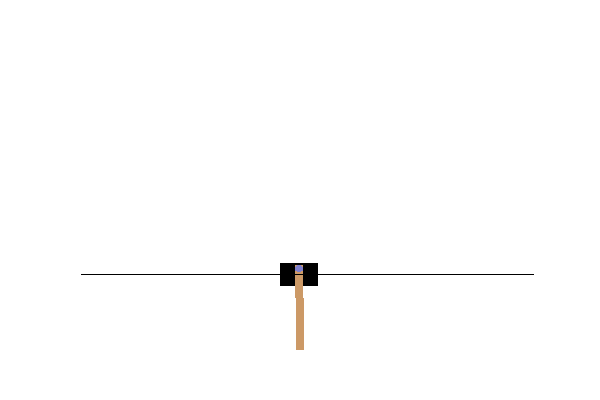
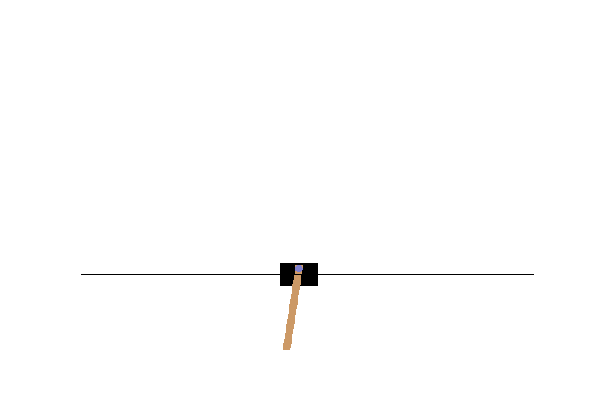
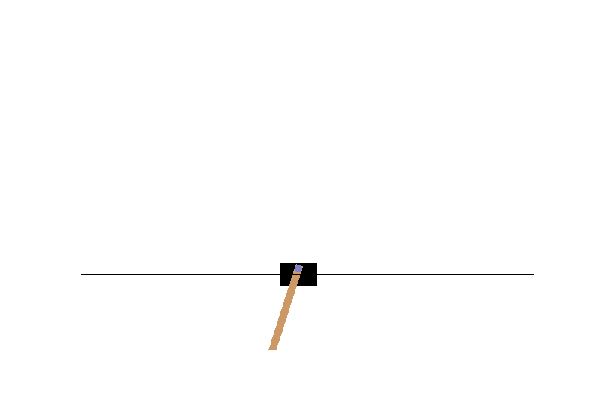
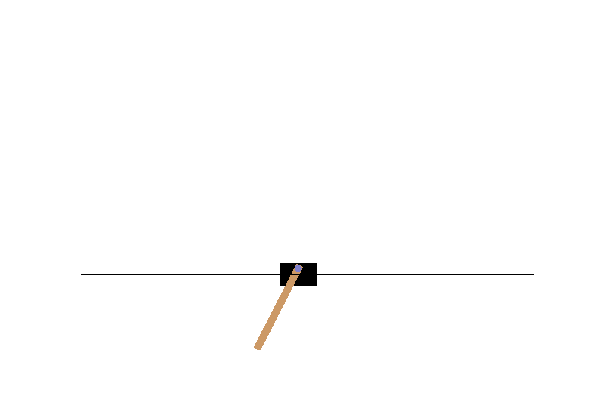
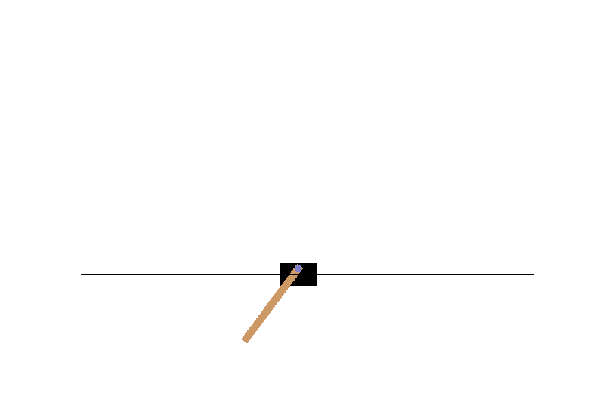
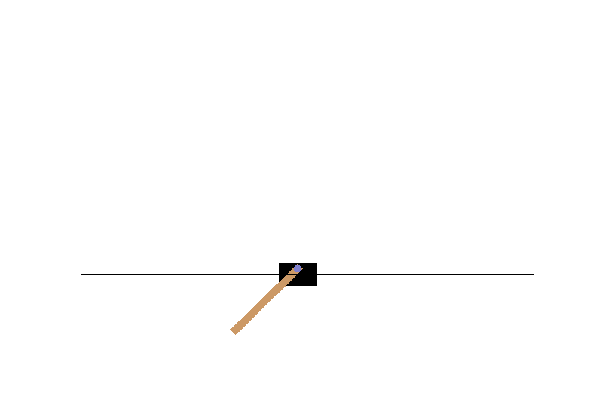
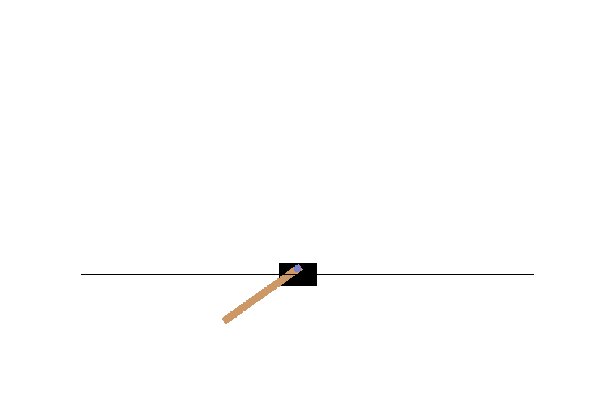
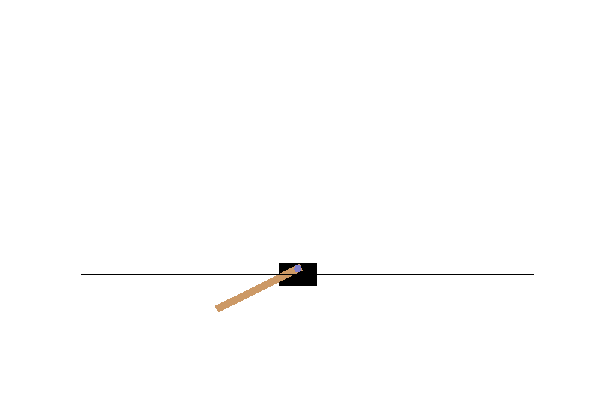
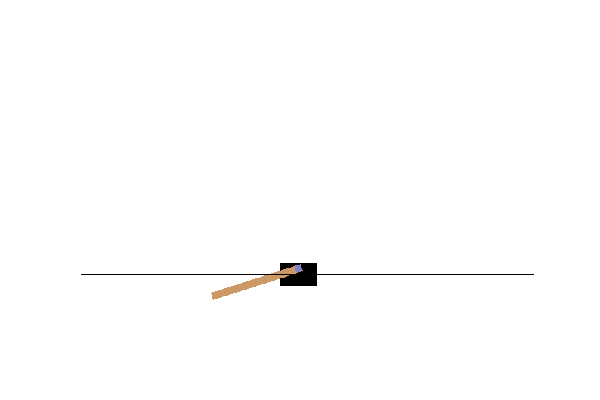
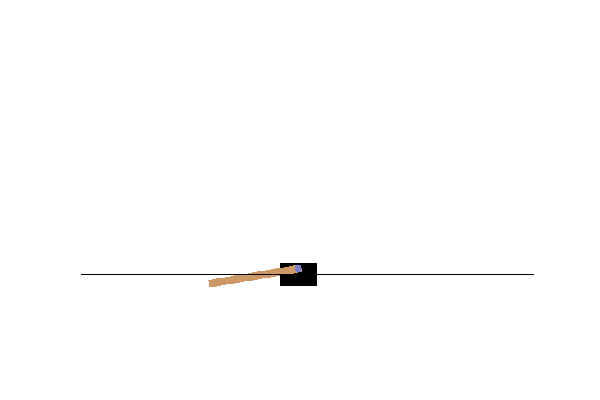
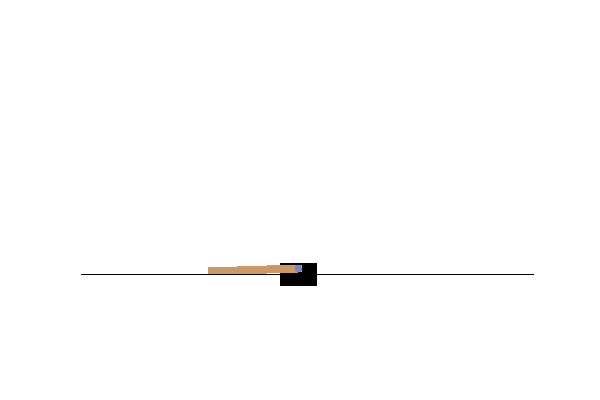
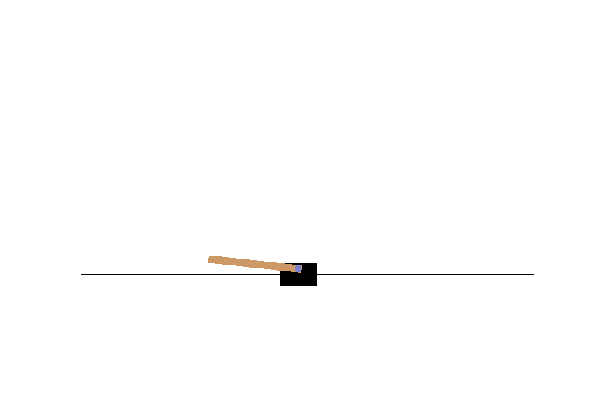
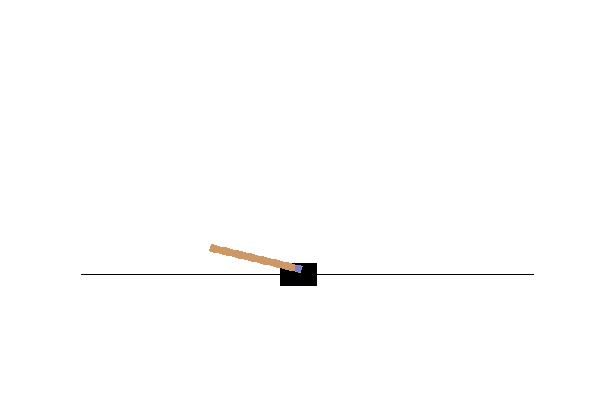
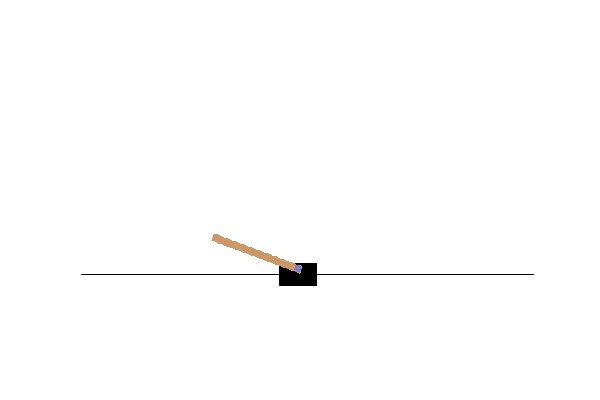
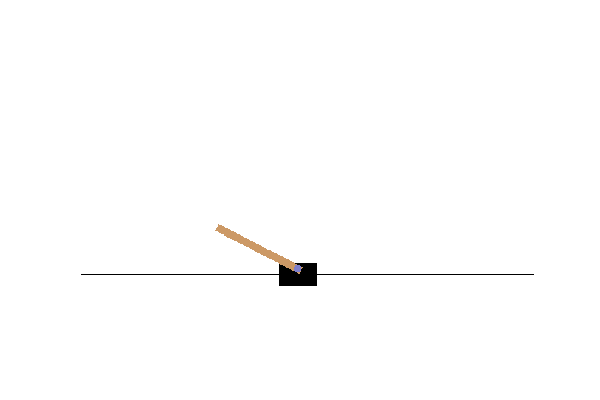
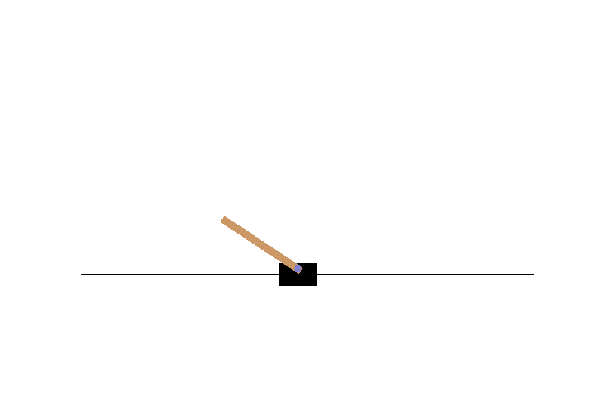
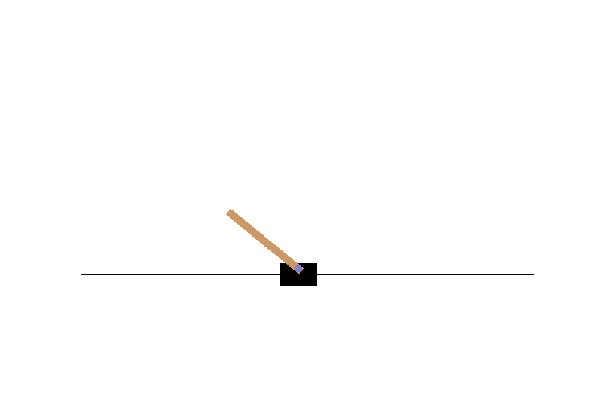
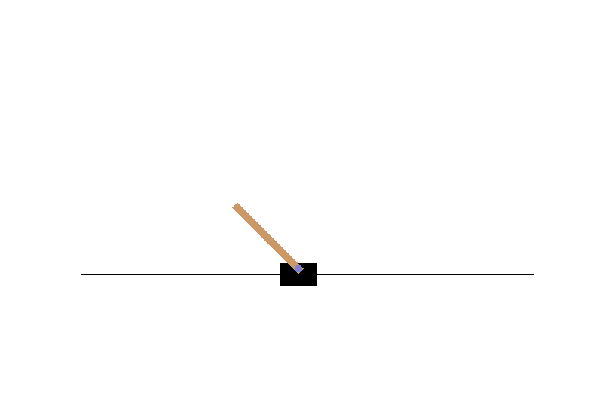
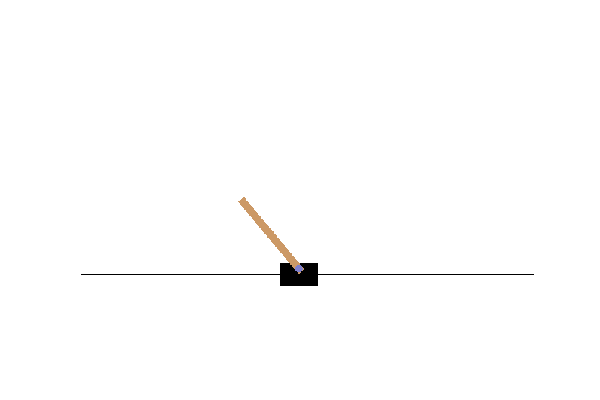
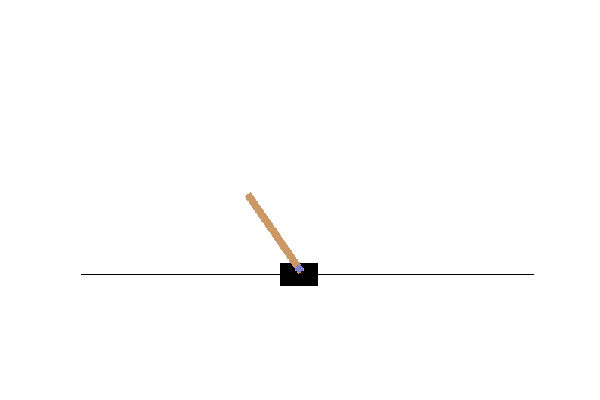
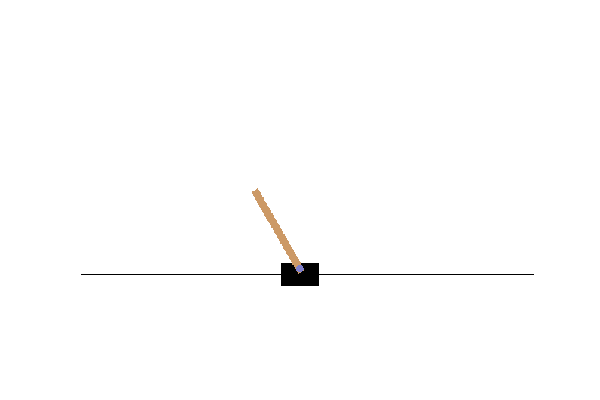
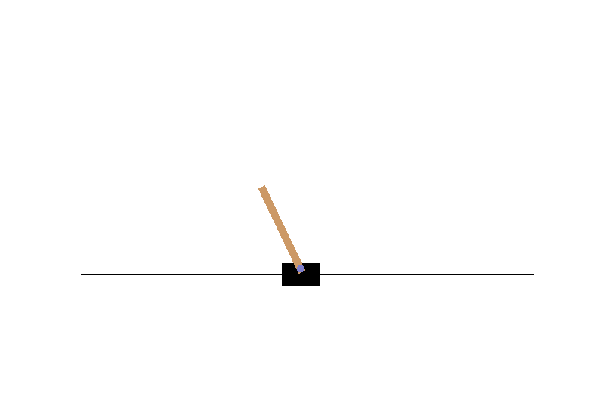
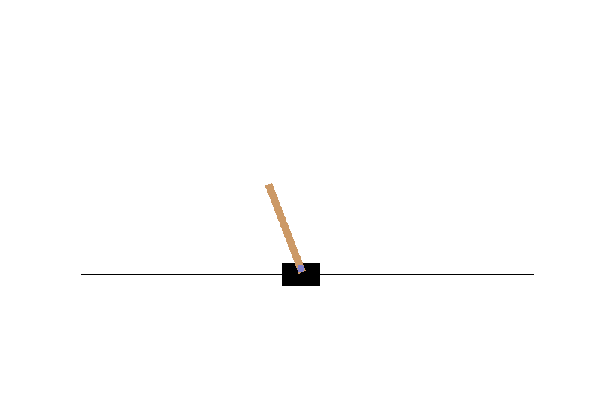
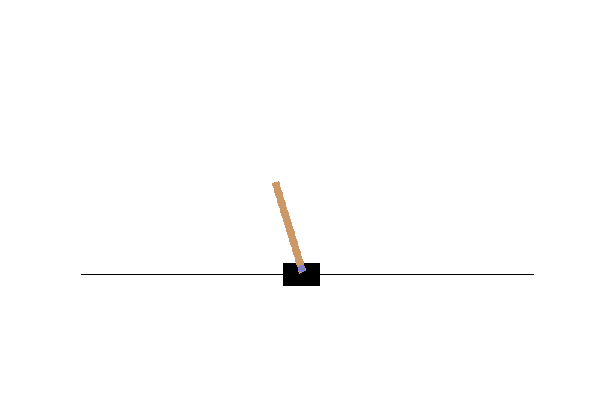
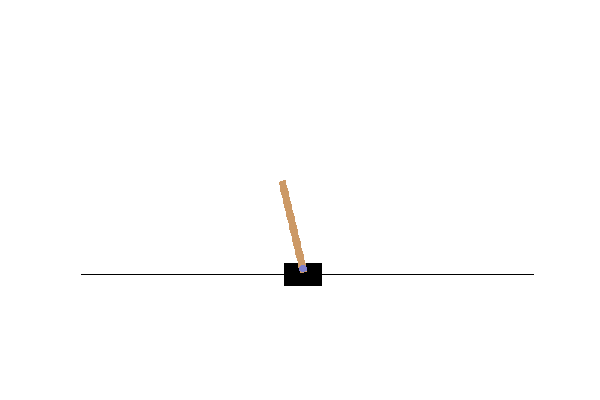
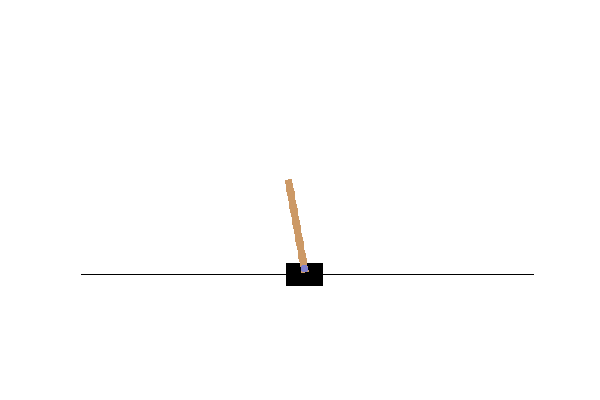
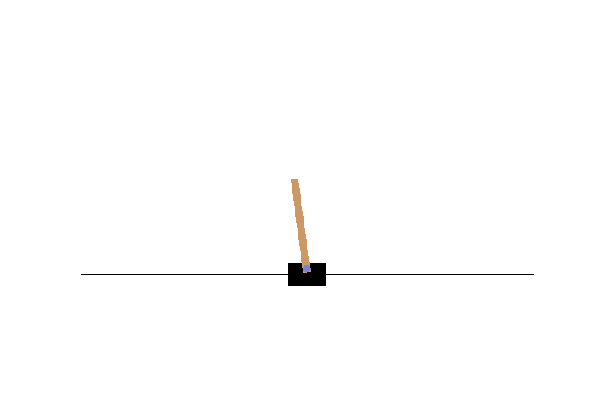
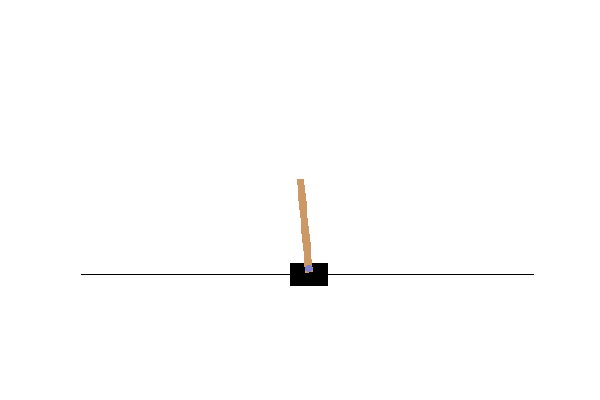
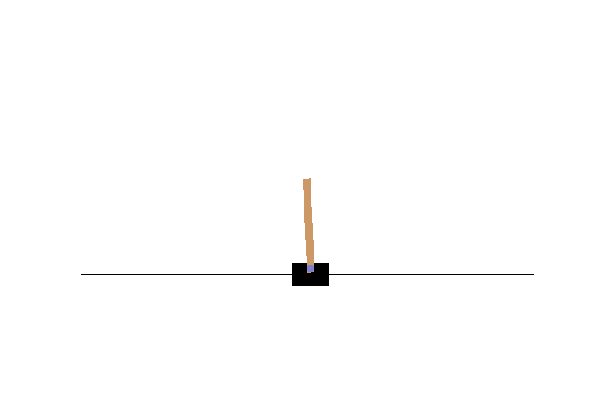
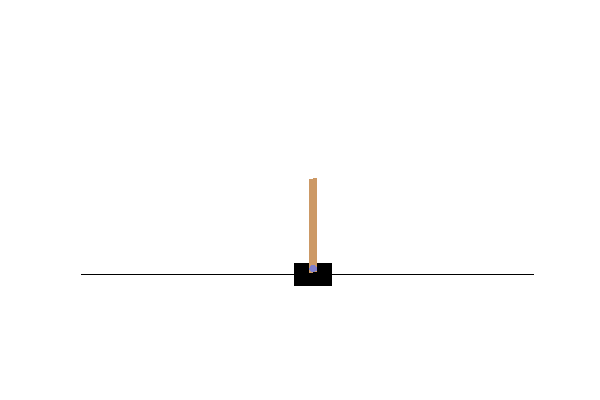
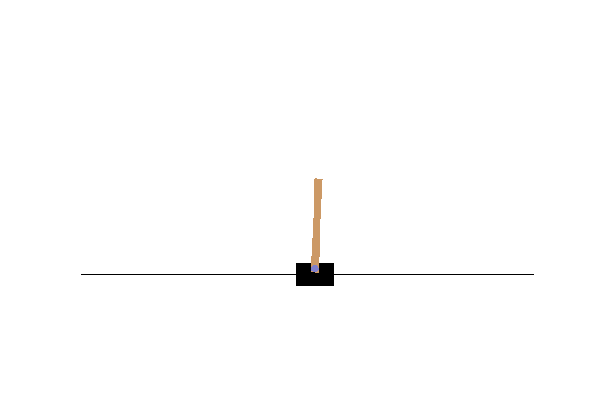
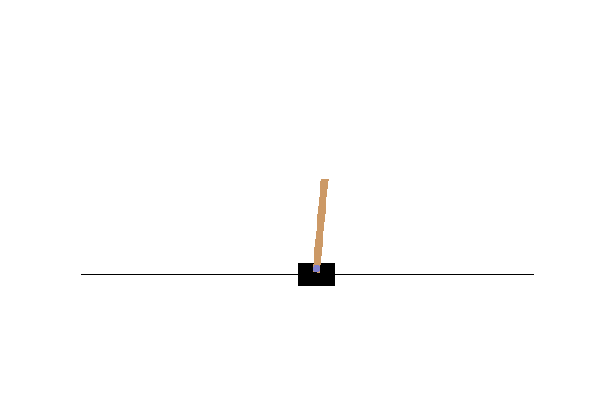
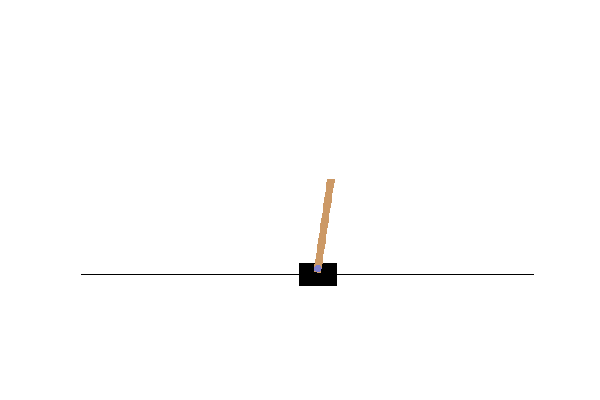
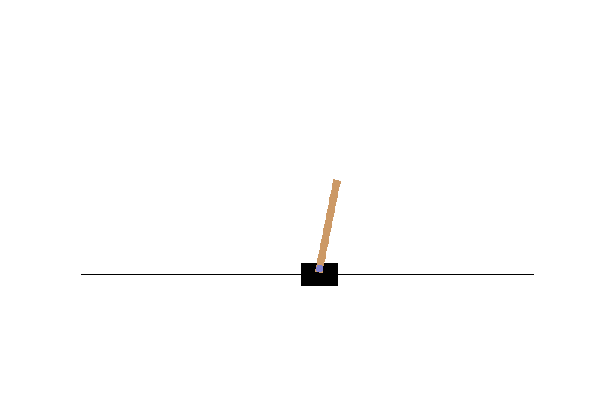
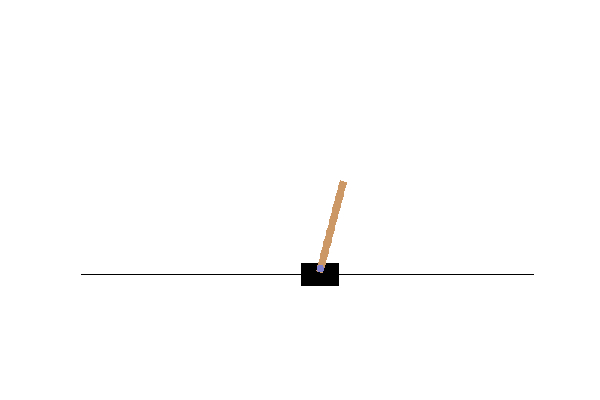
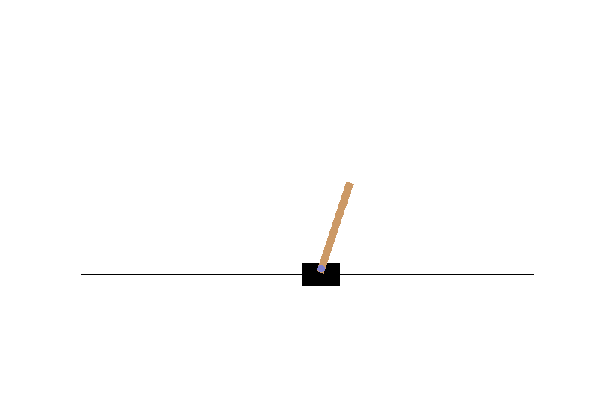
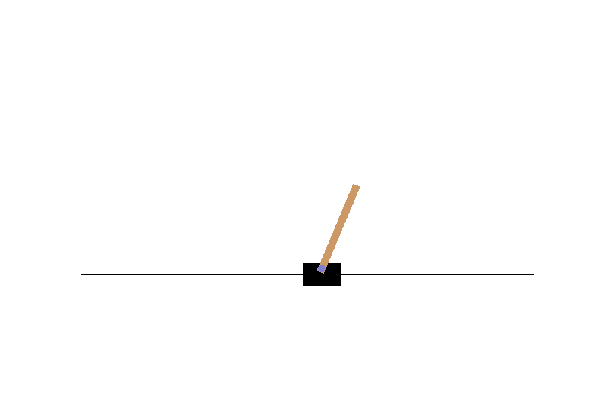
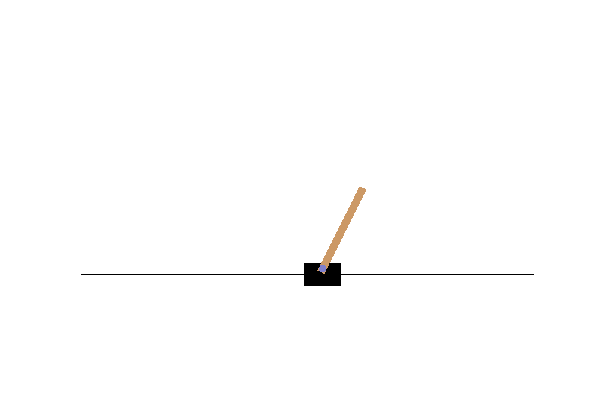
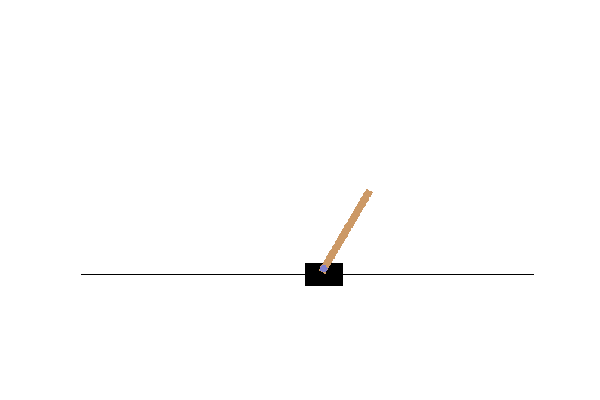
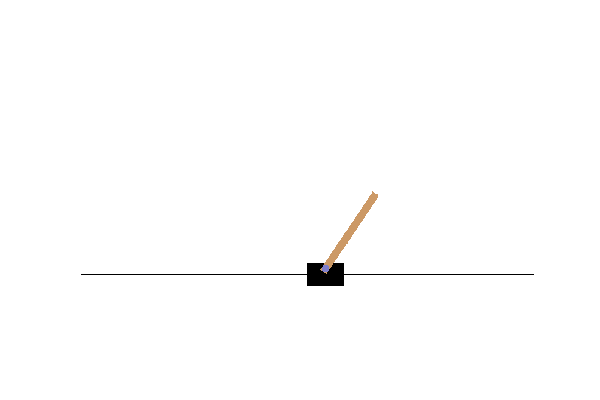
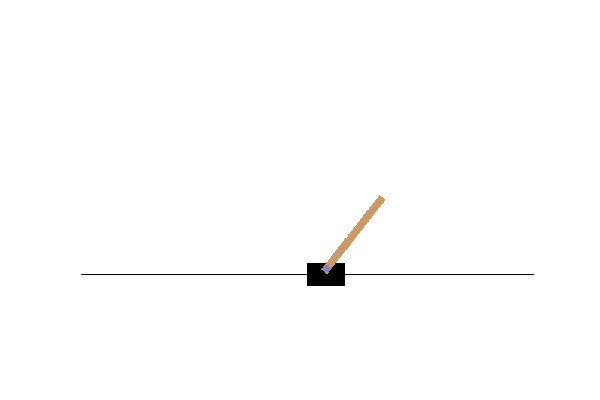
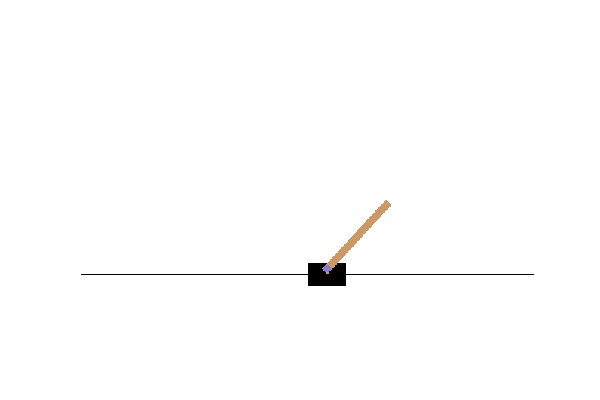
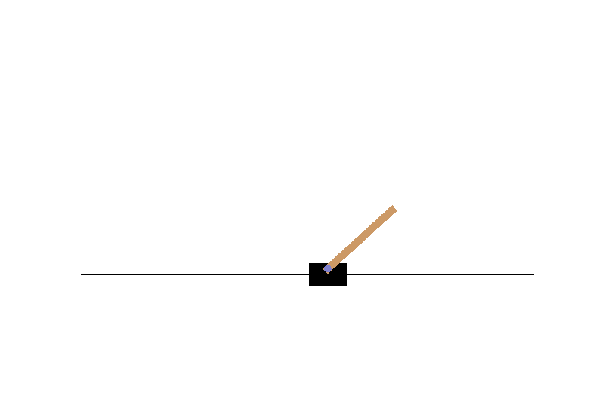
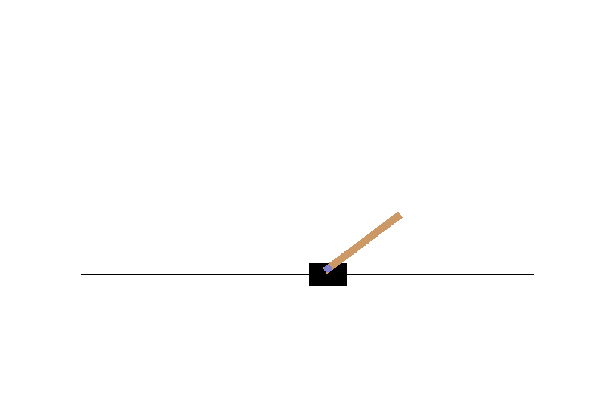
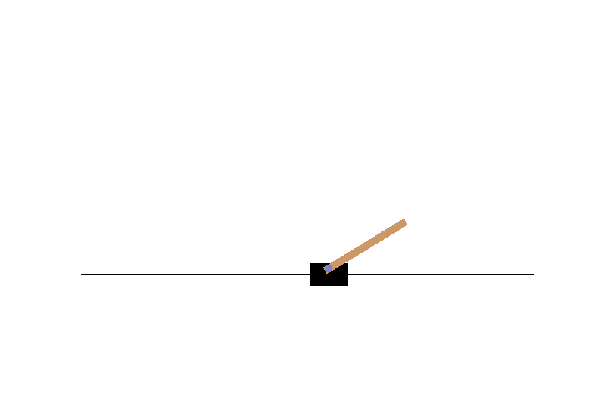
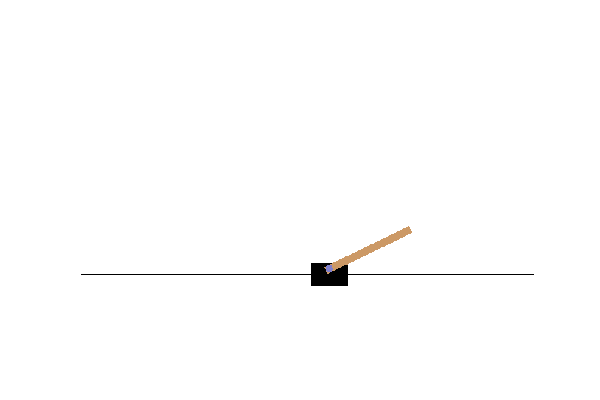
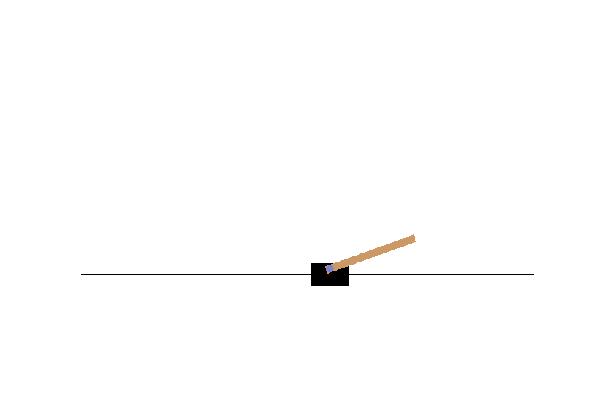
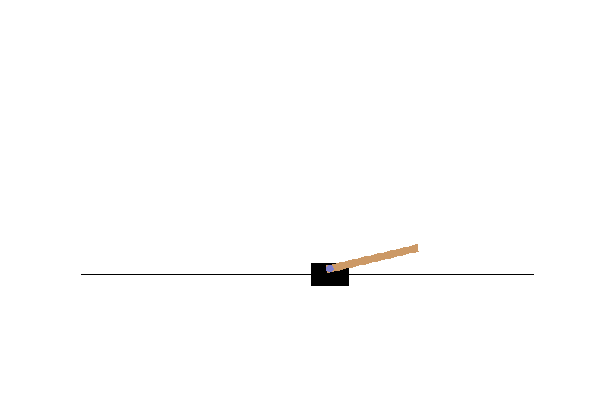
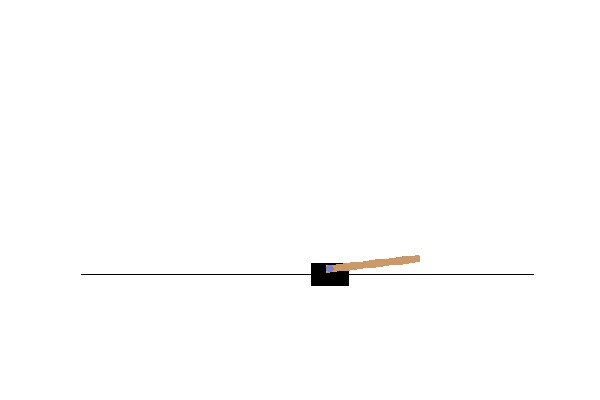
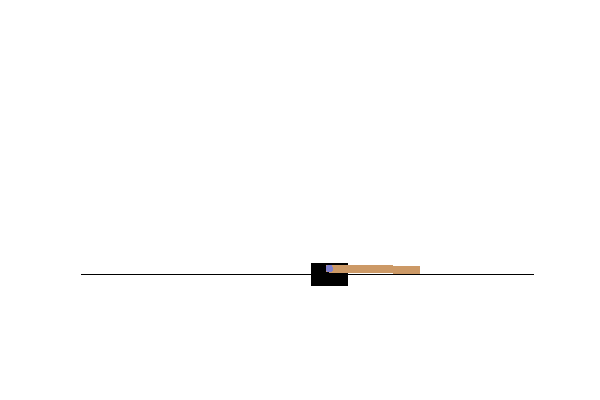
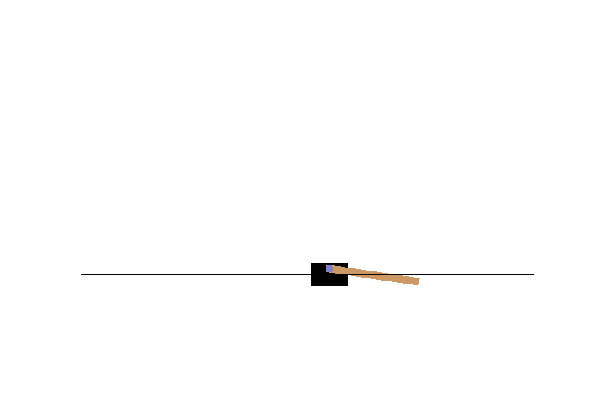
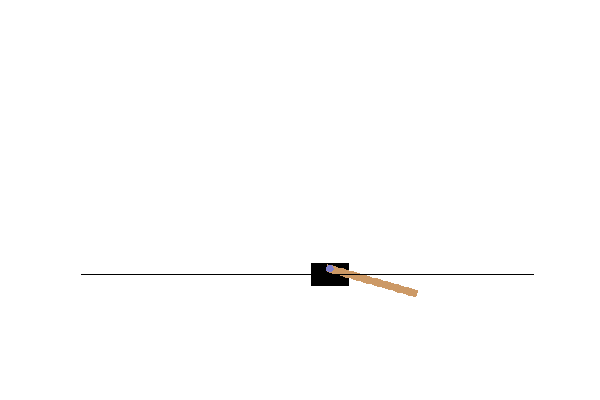
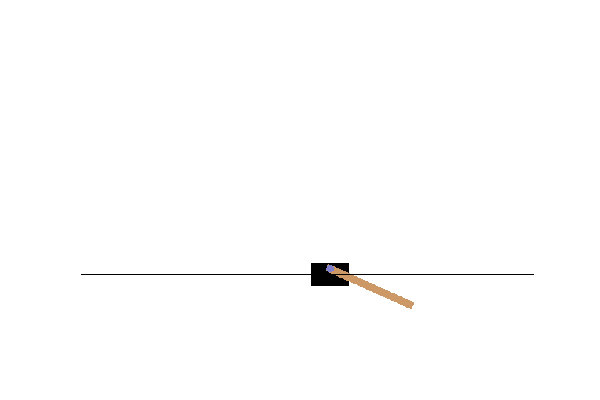
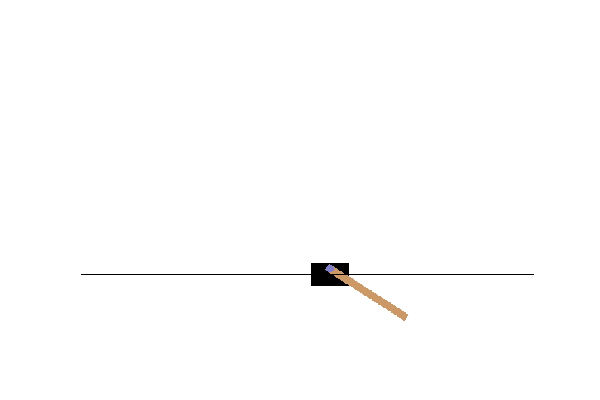
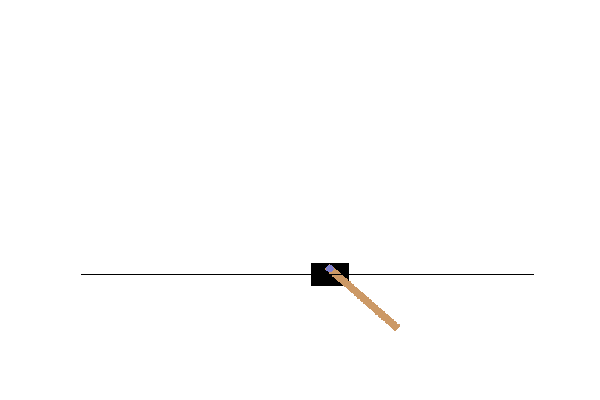
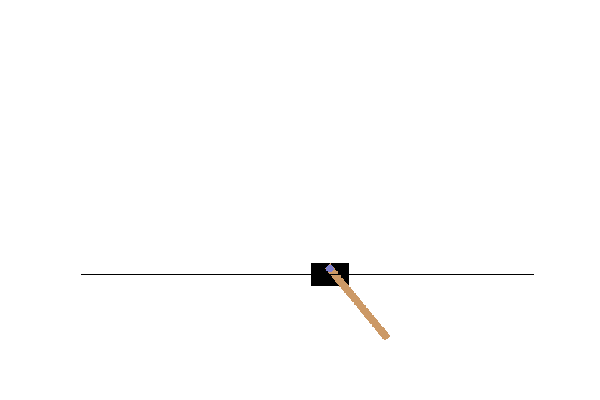
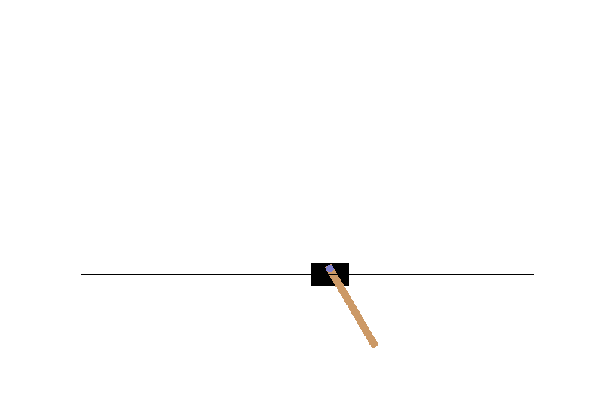
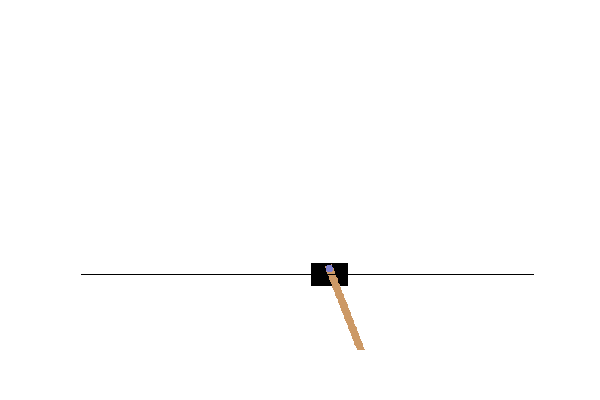
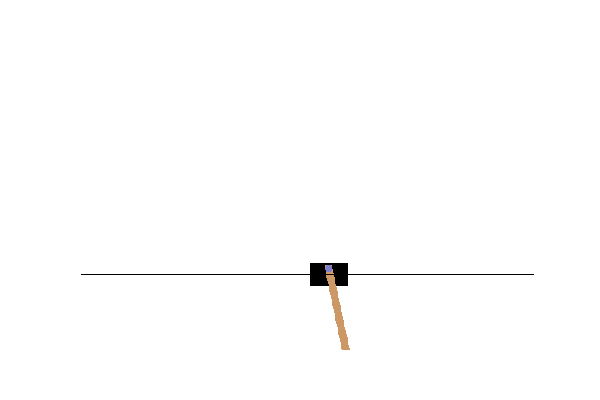
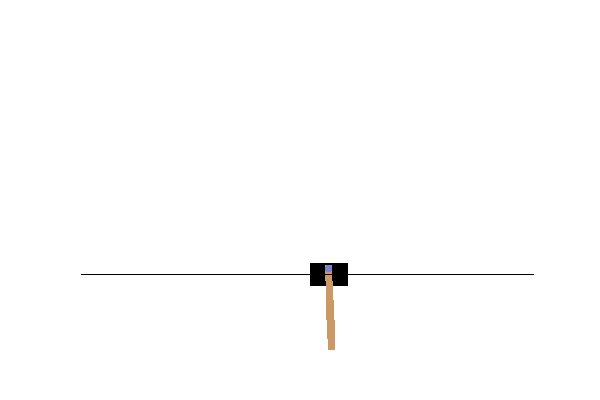
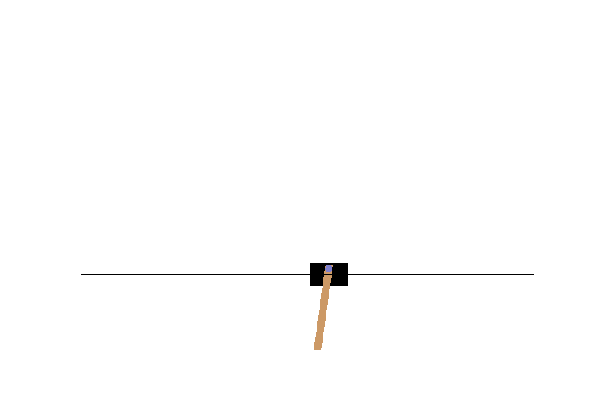
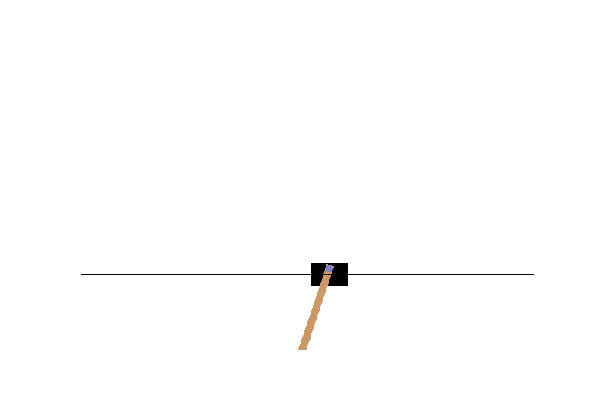
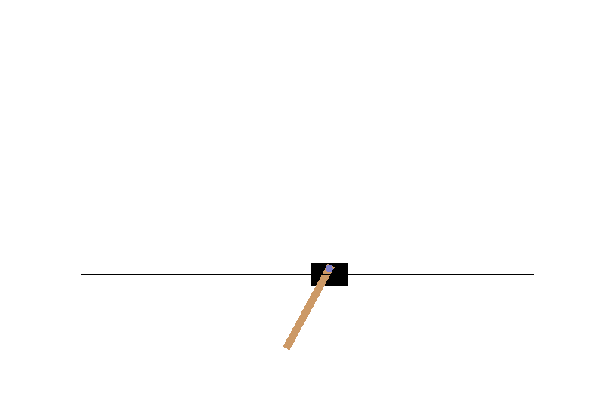
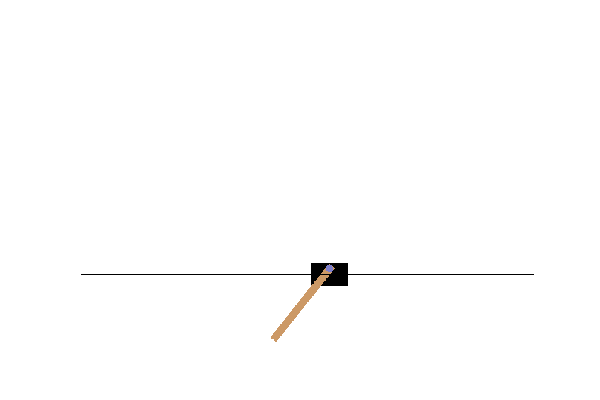
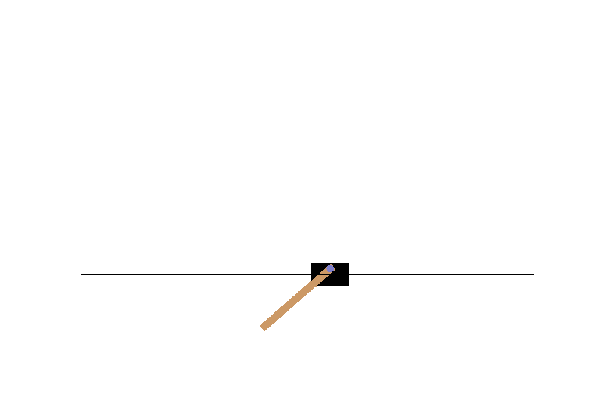
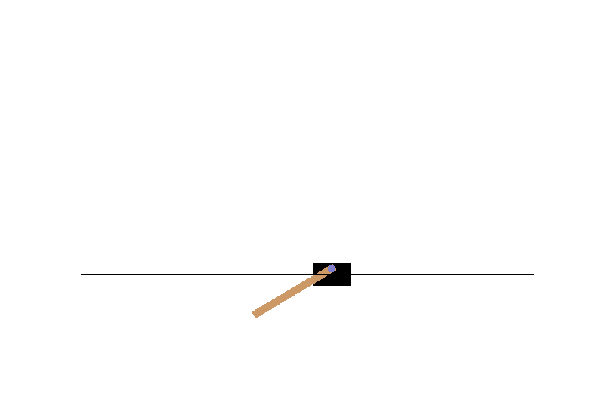
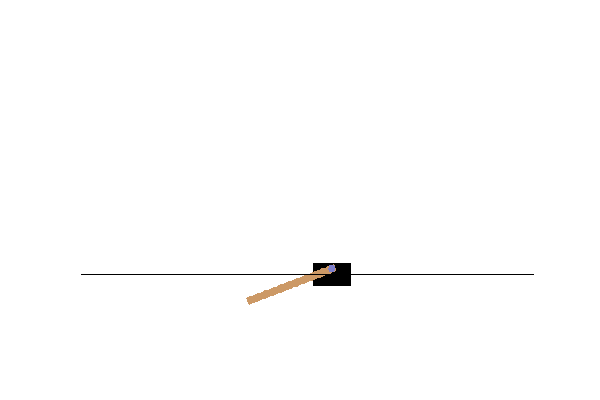
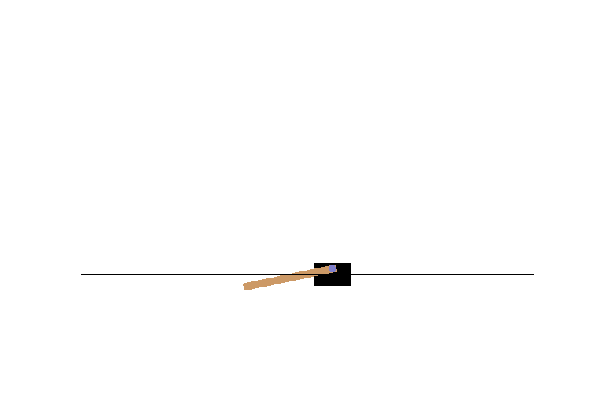
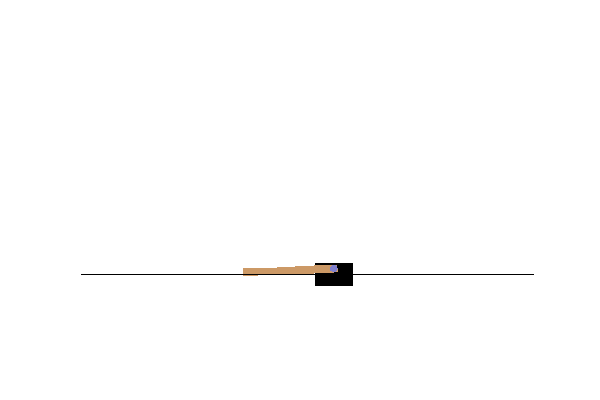
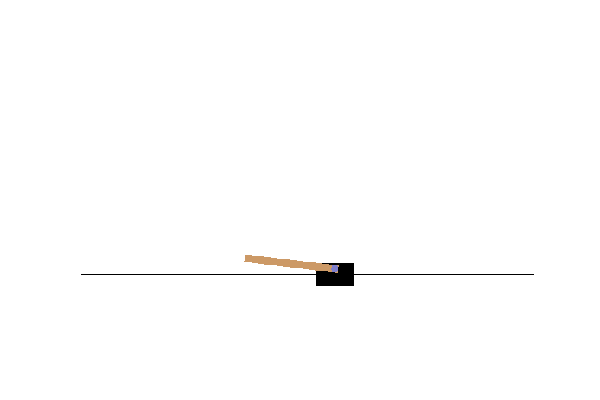
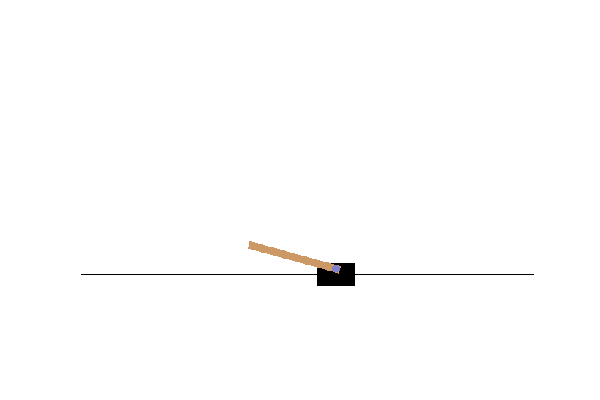
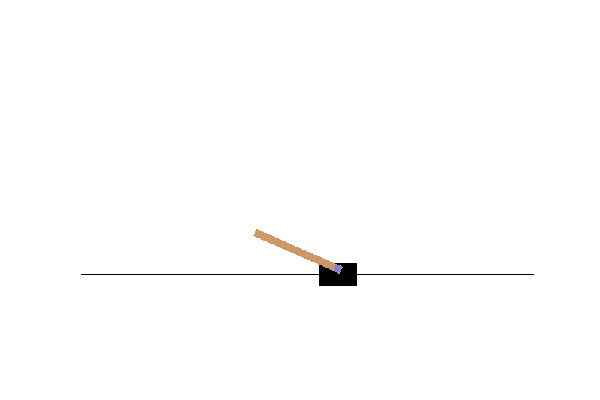
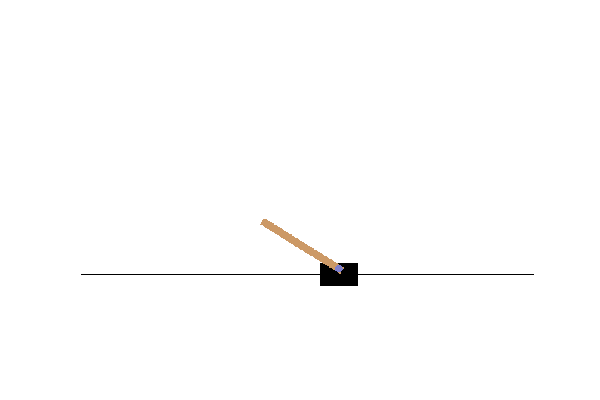
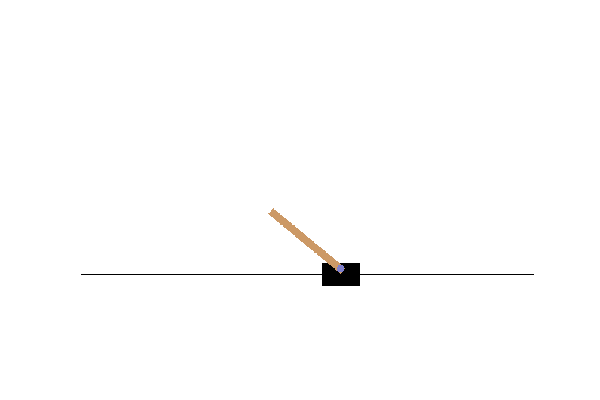
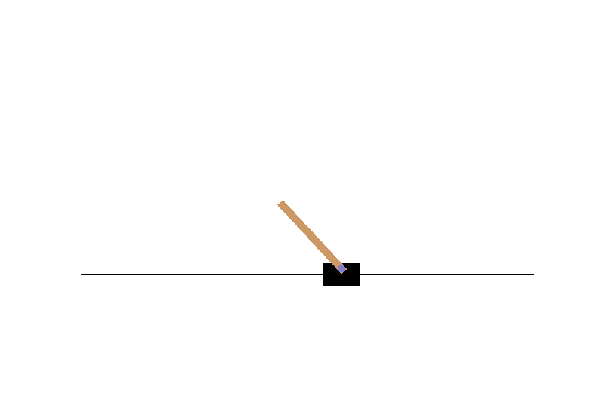
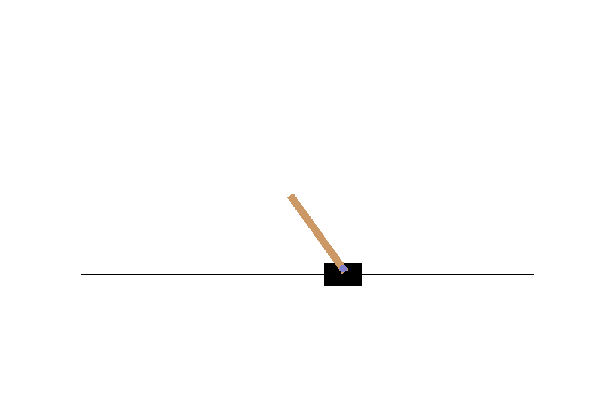
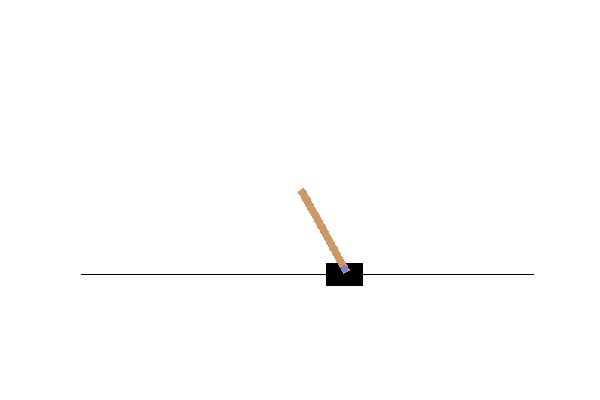
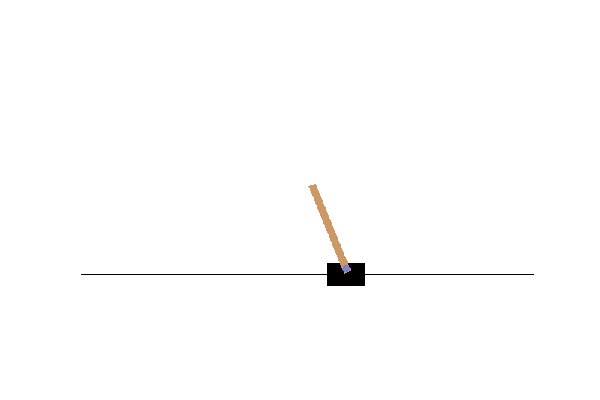
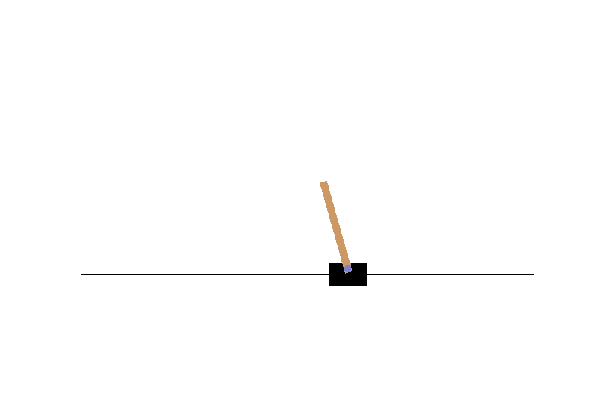

In [7]:
# 動画を保存と描画
display_frames_as_gif(frames)
